### Feature Analysis

/local/home/demircis/anaconda3/envs/DRIVE-venv/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/local/home/demircis/anaconda3/envs/DRIVE-venv/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/local/home/demircis/anaconda3/envs/DRIVE-venv/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


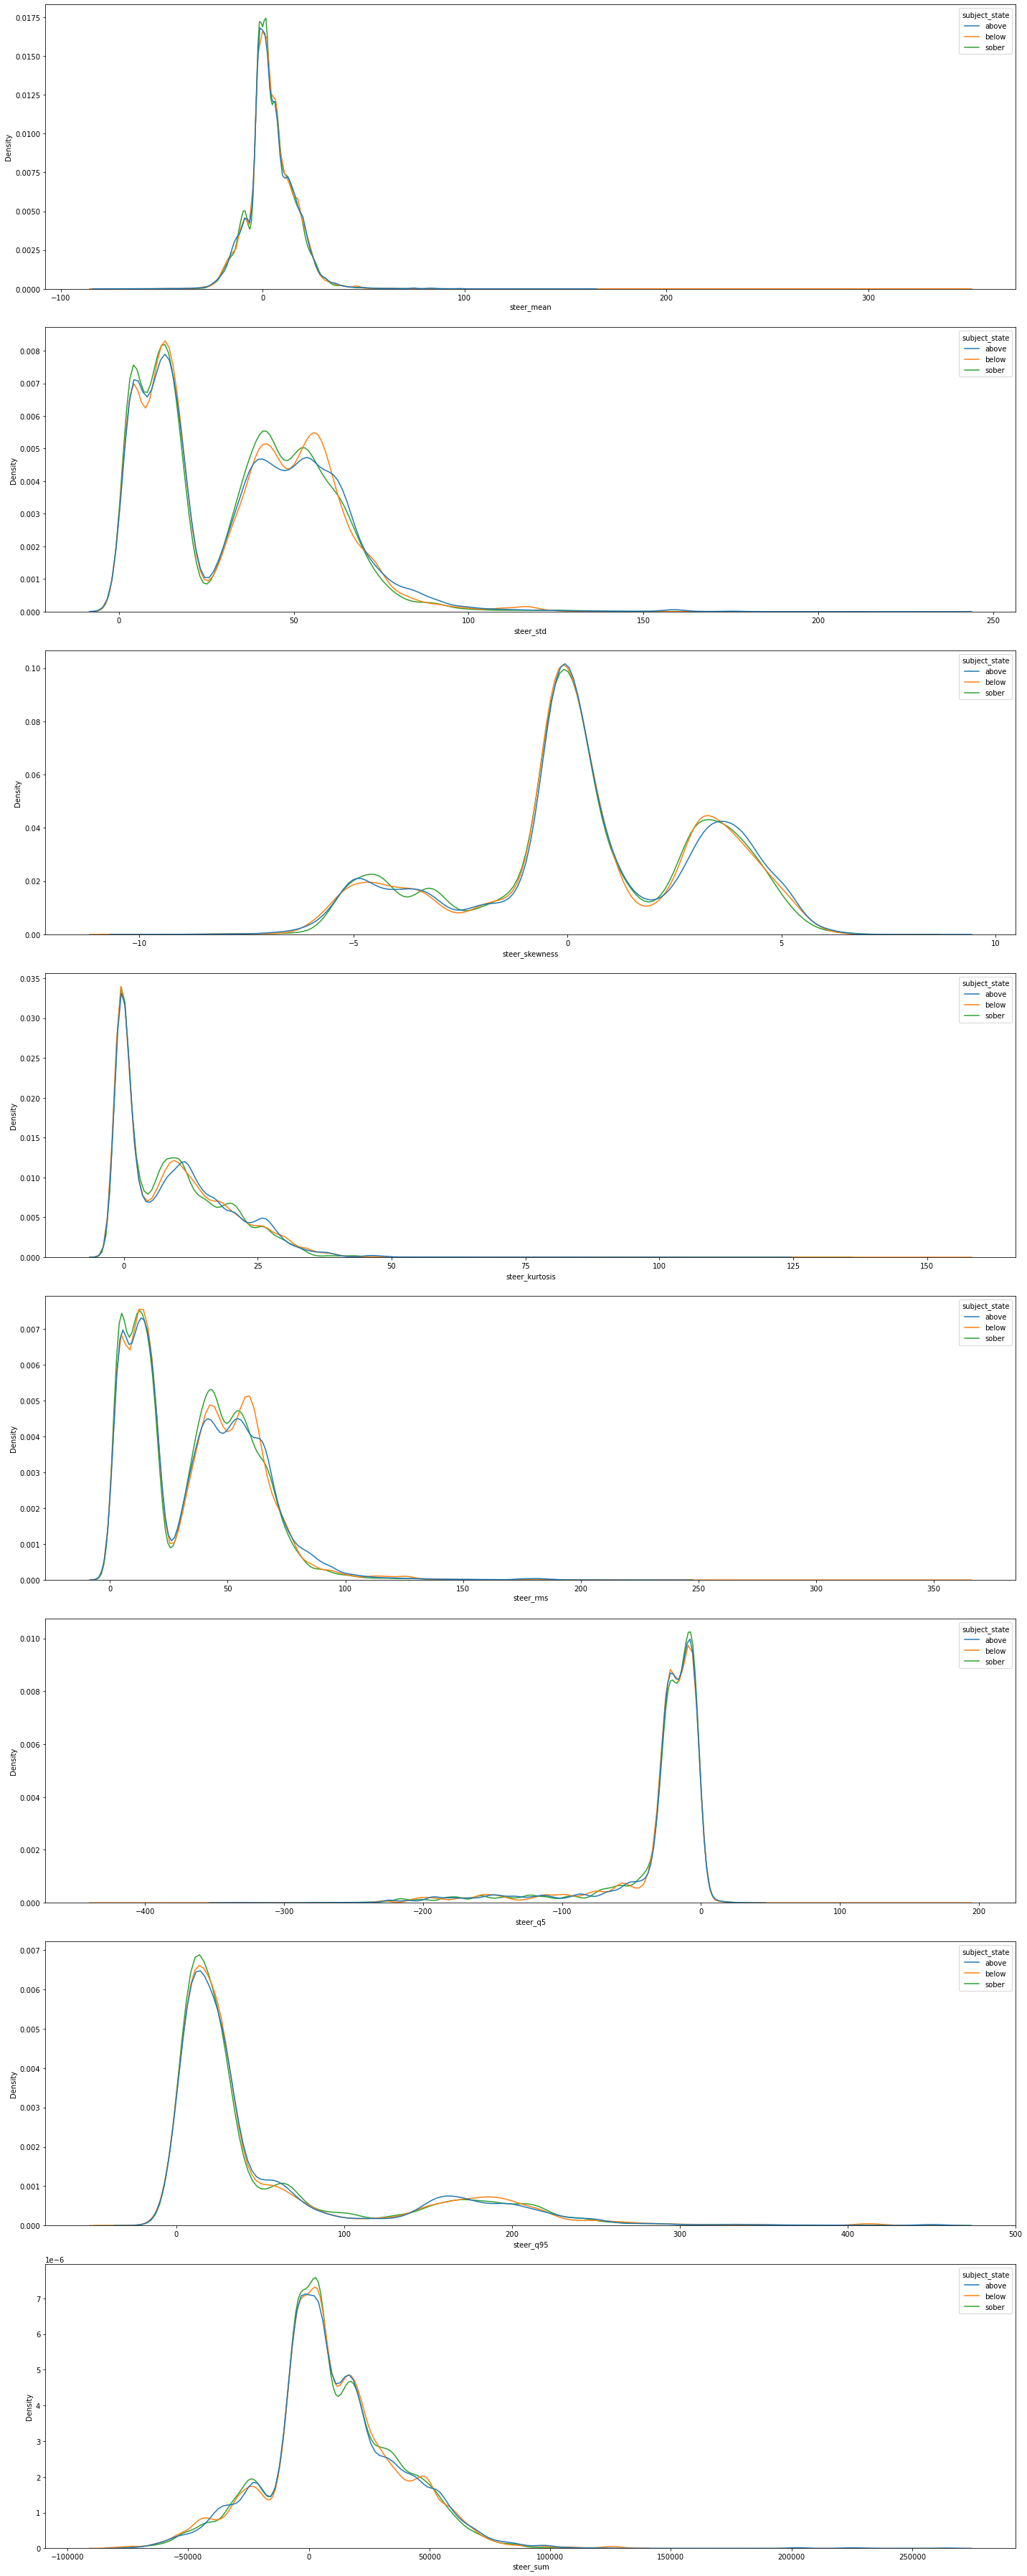

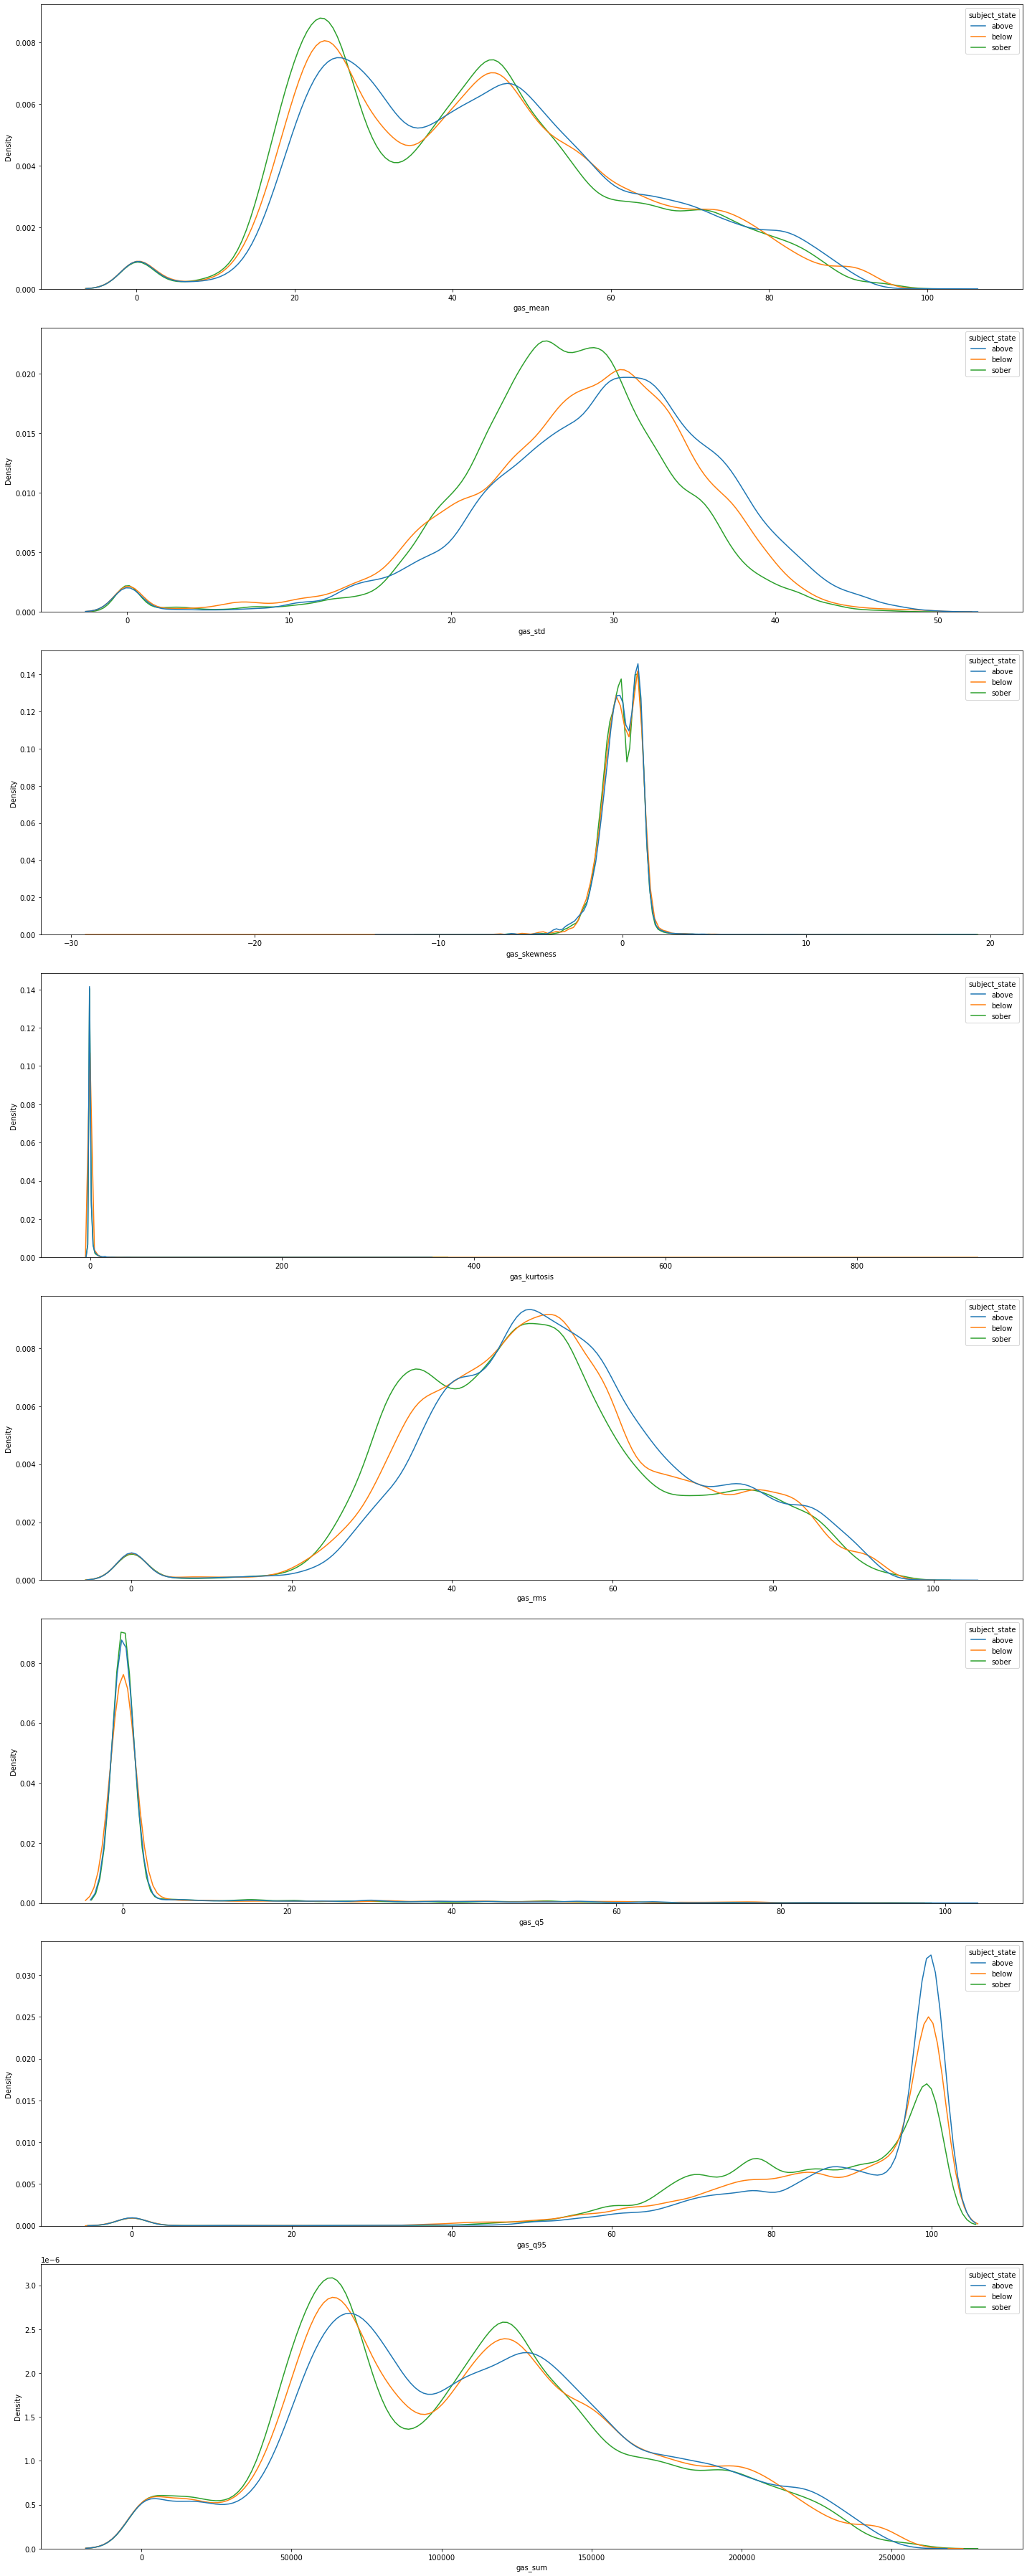

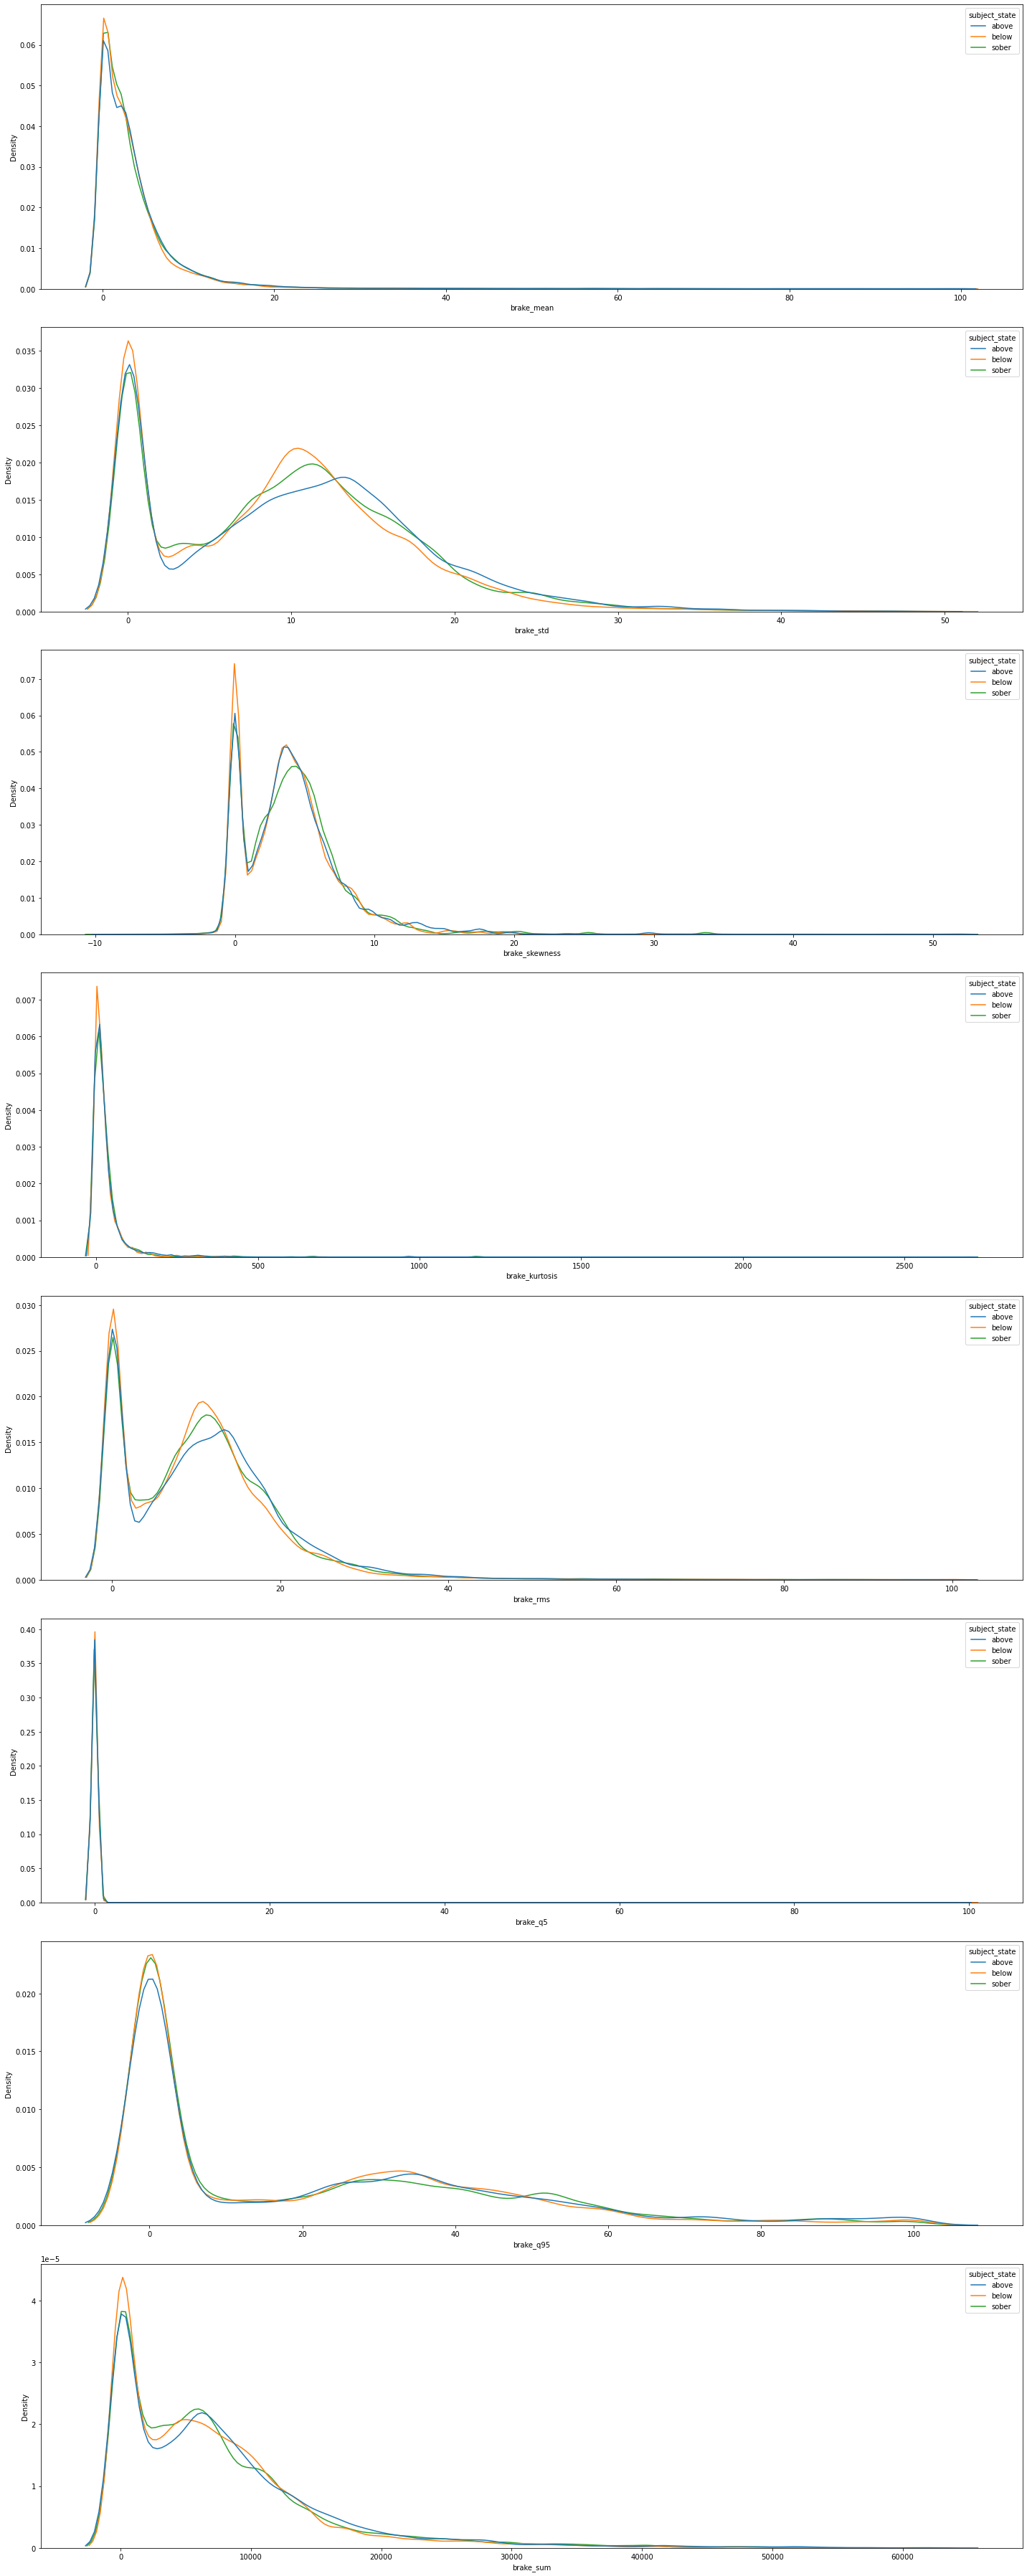

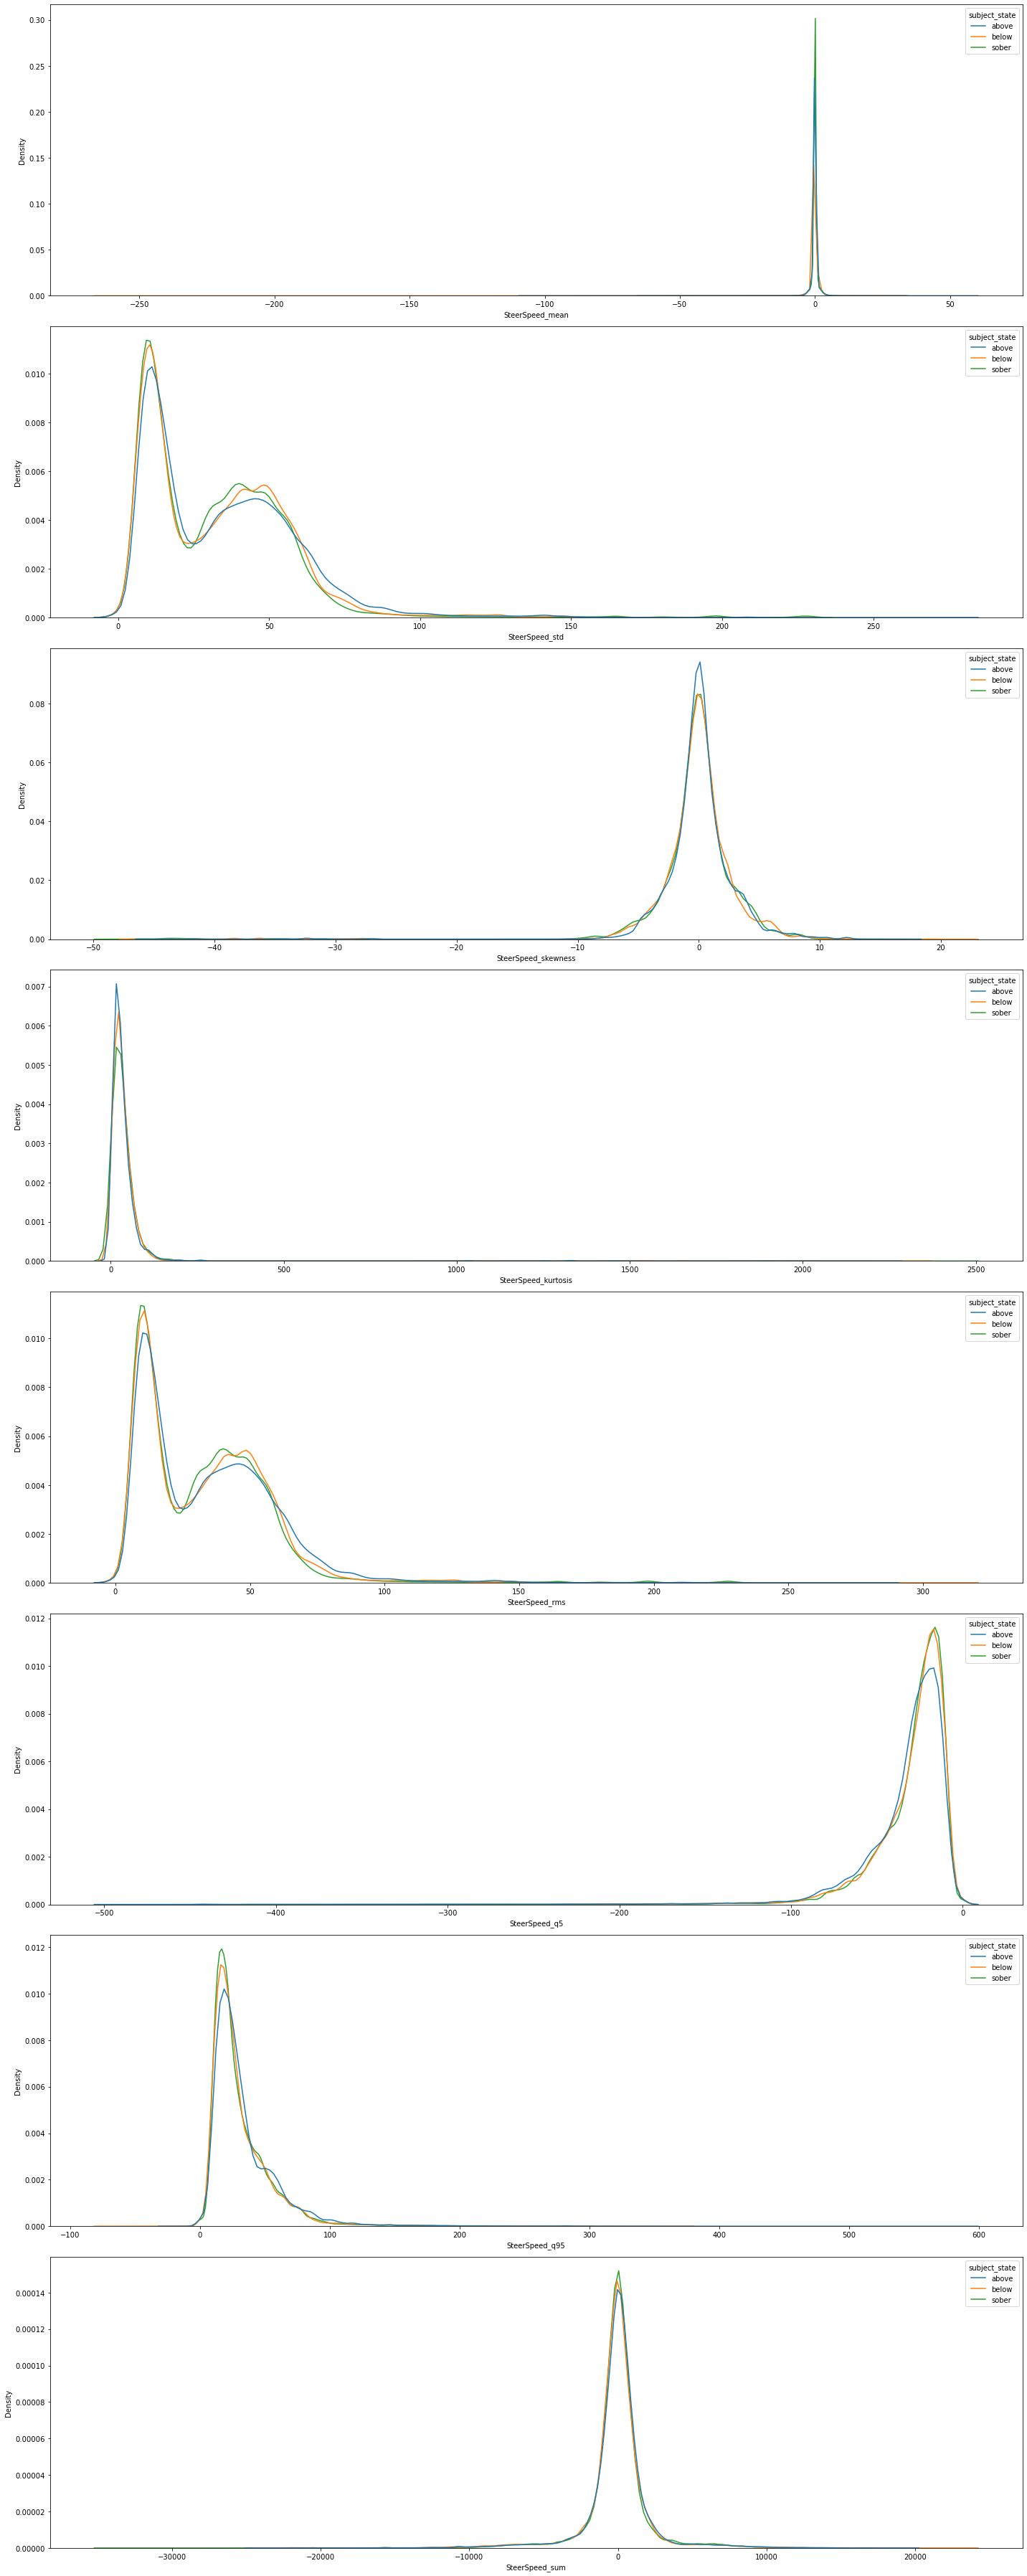

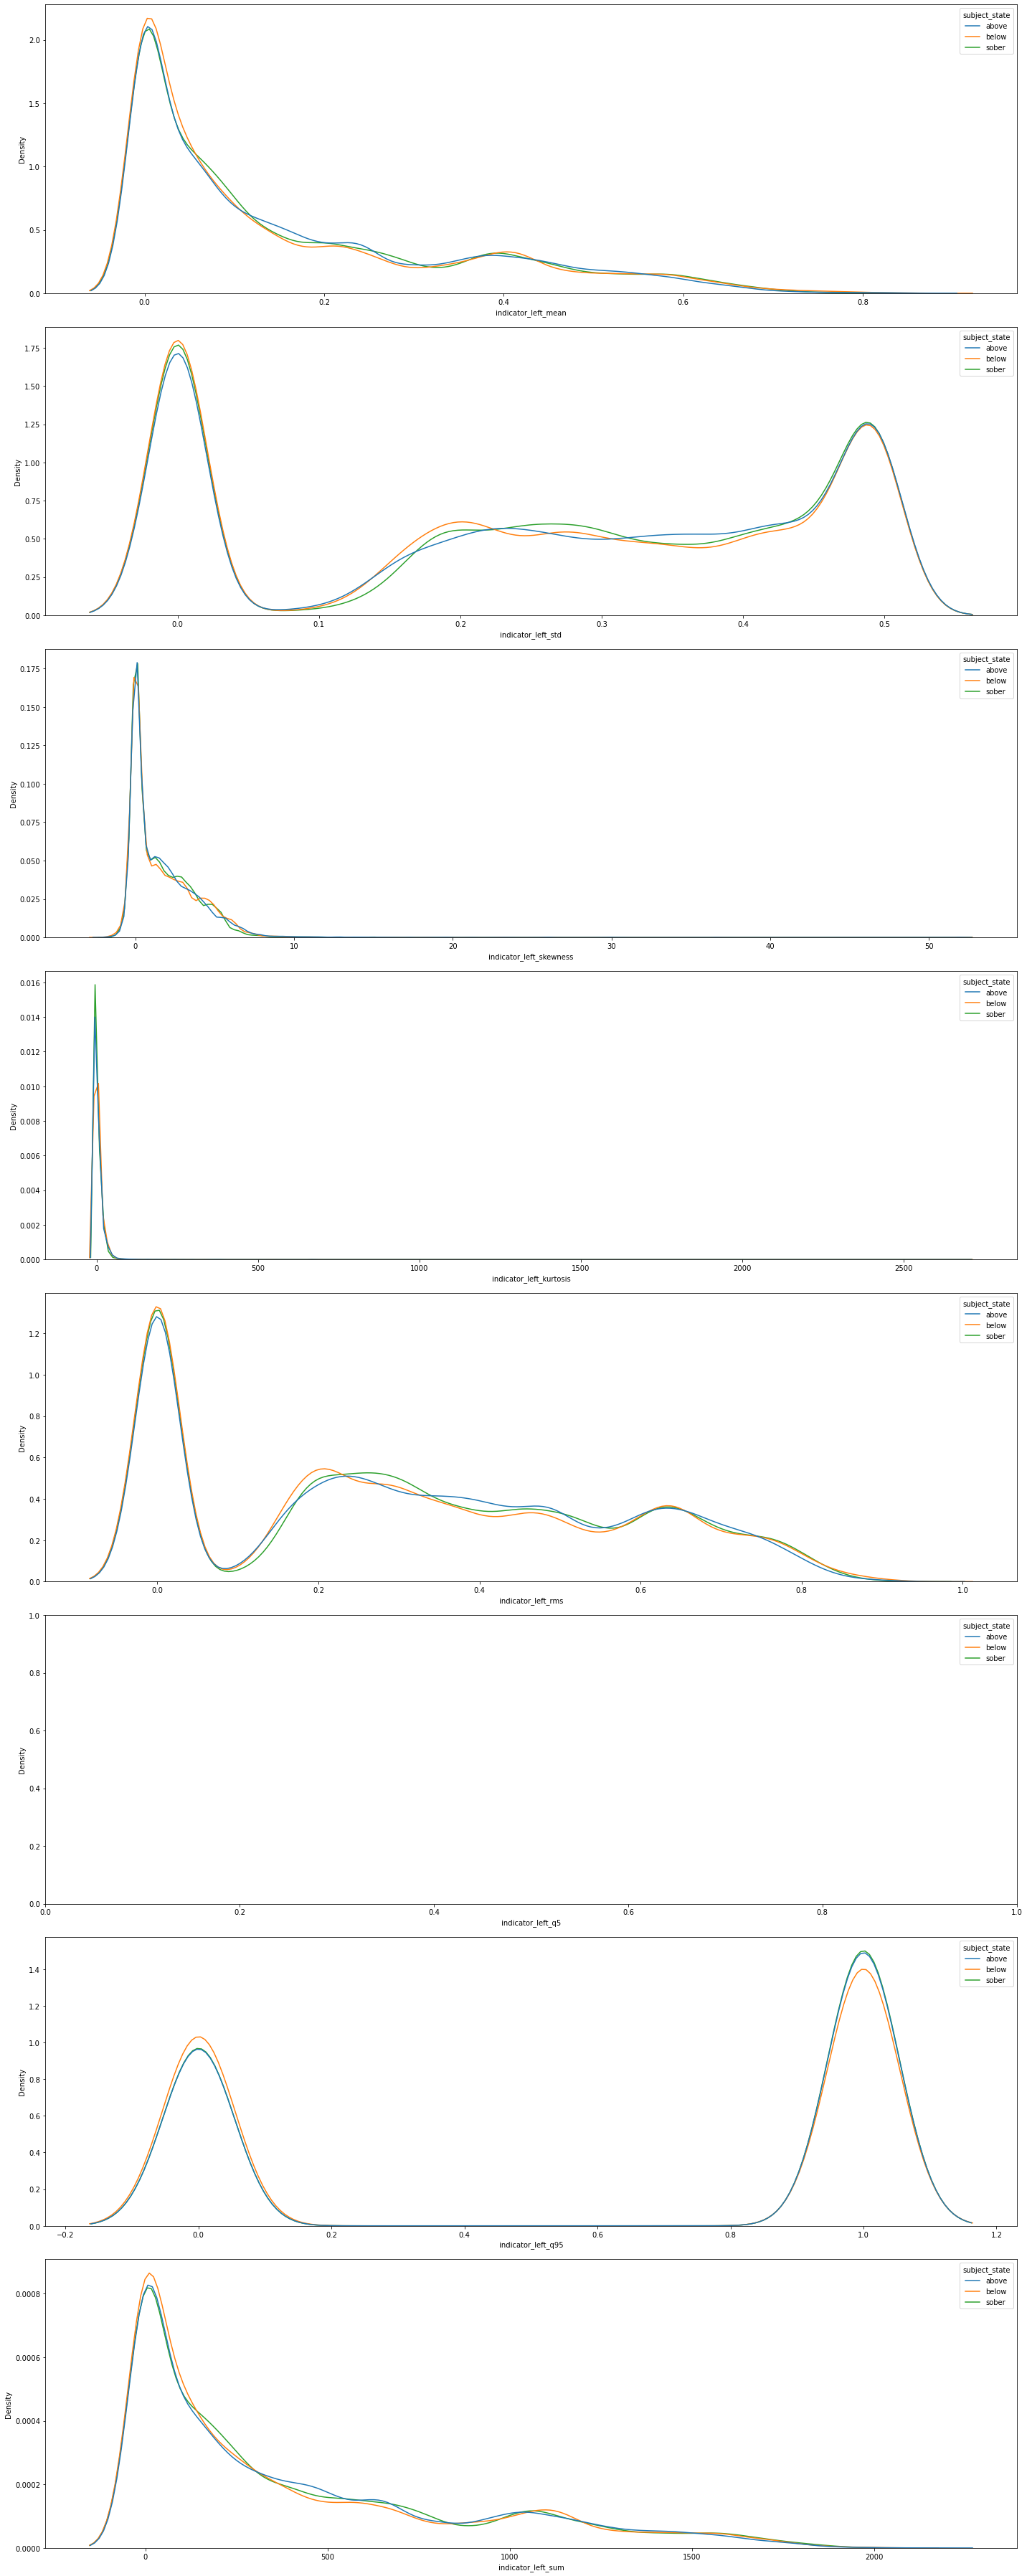

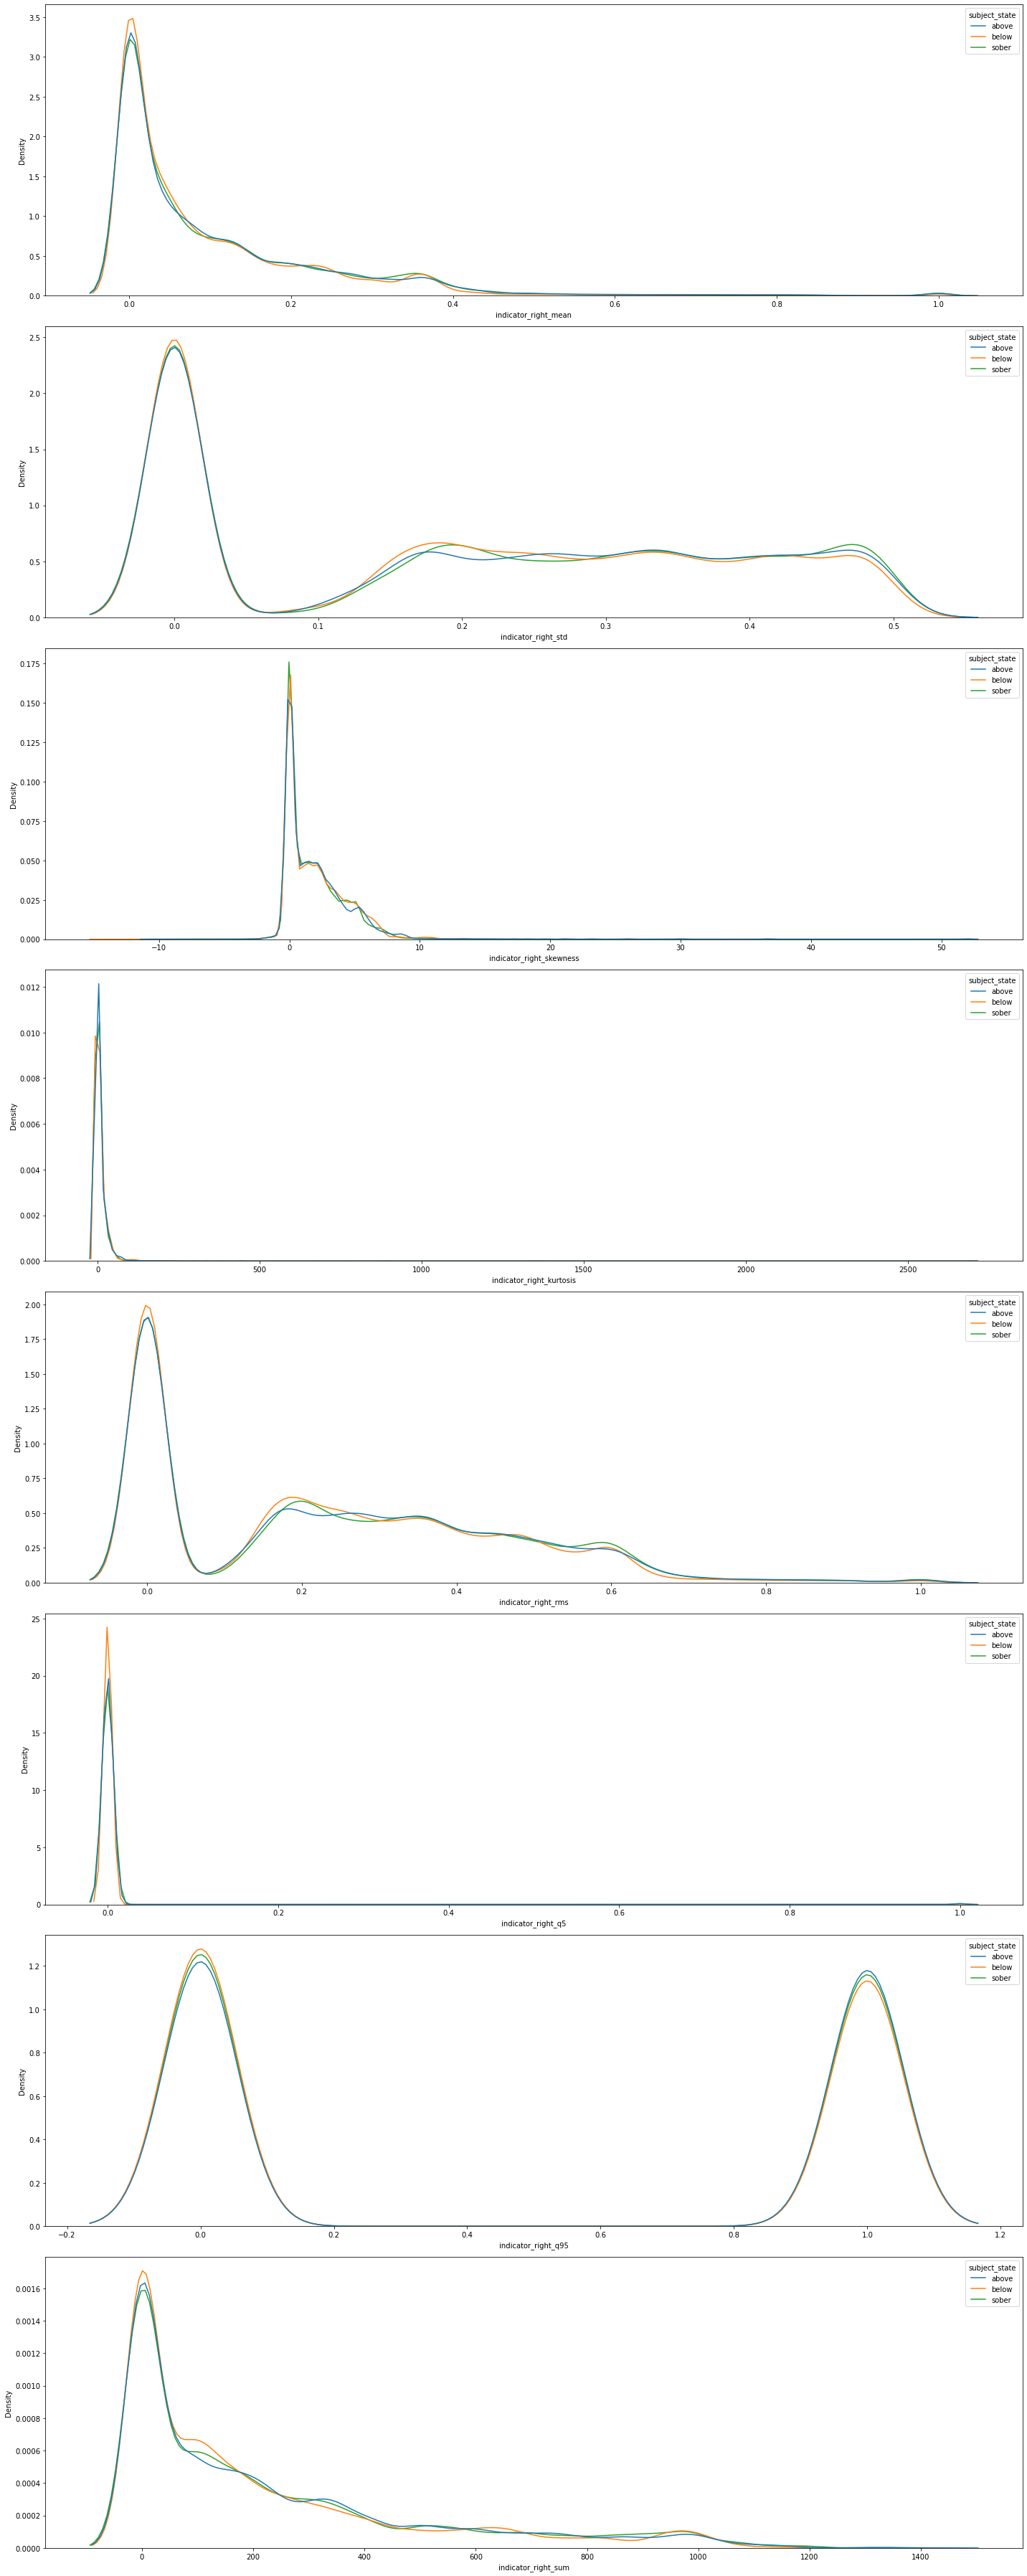

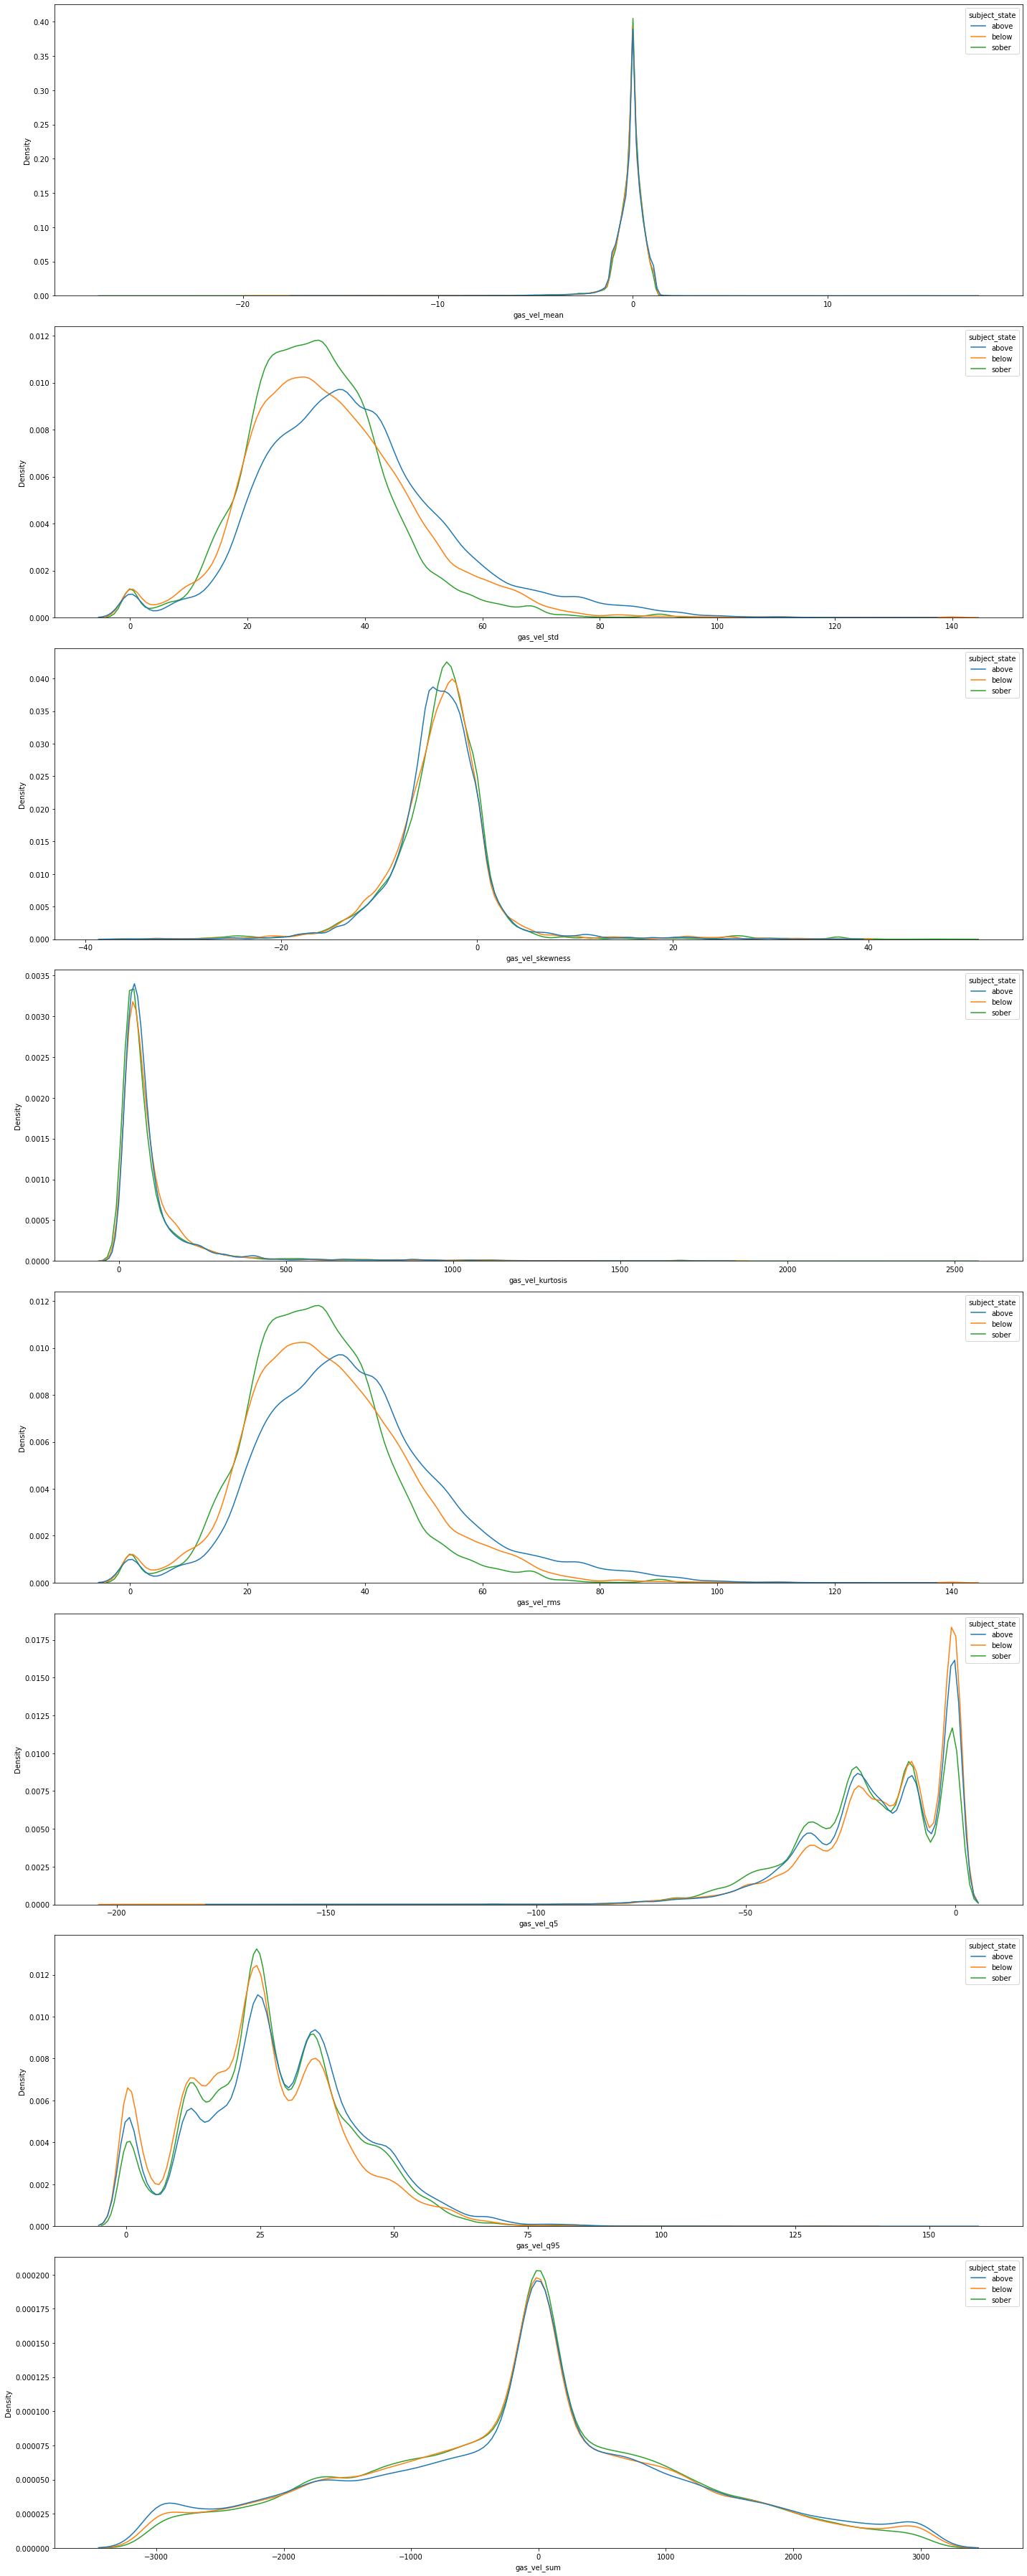

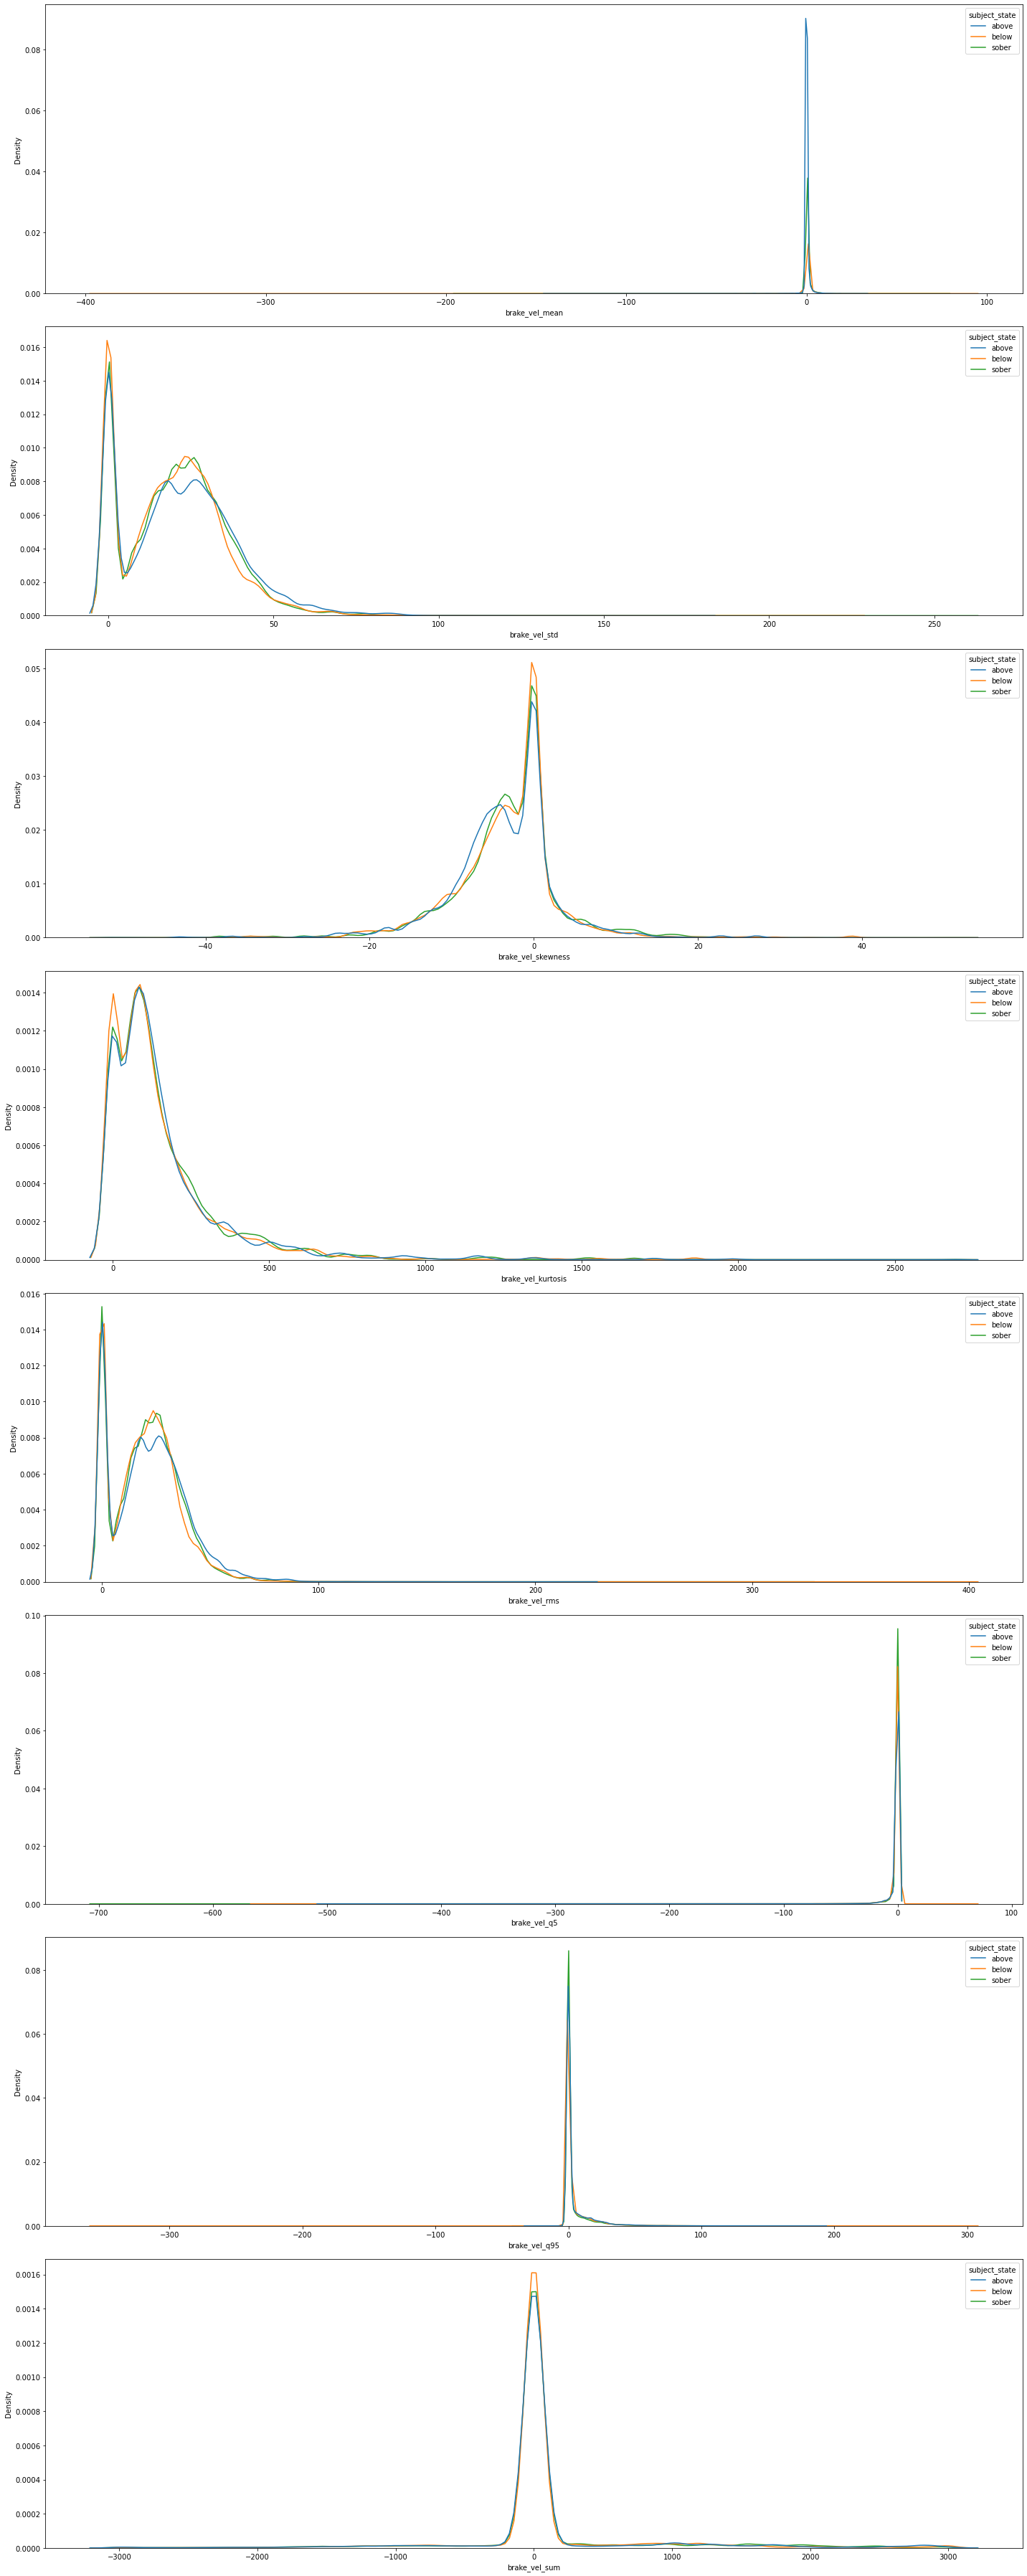

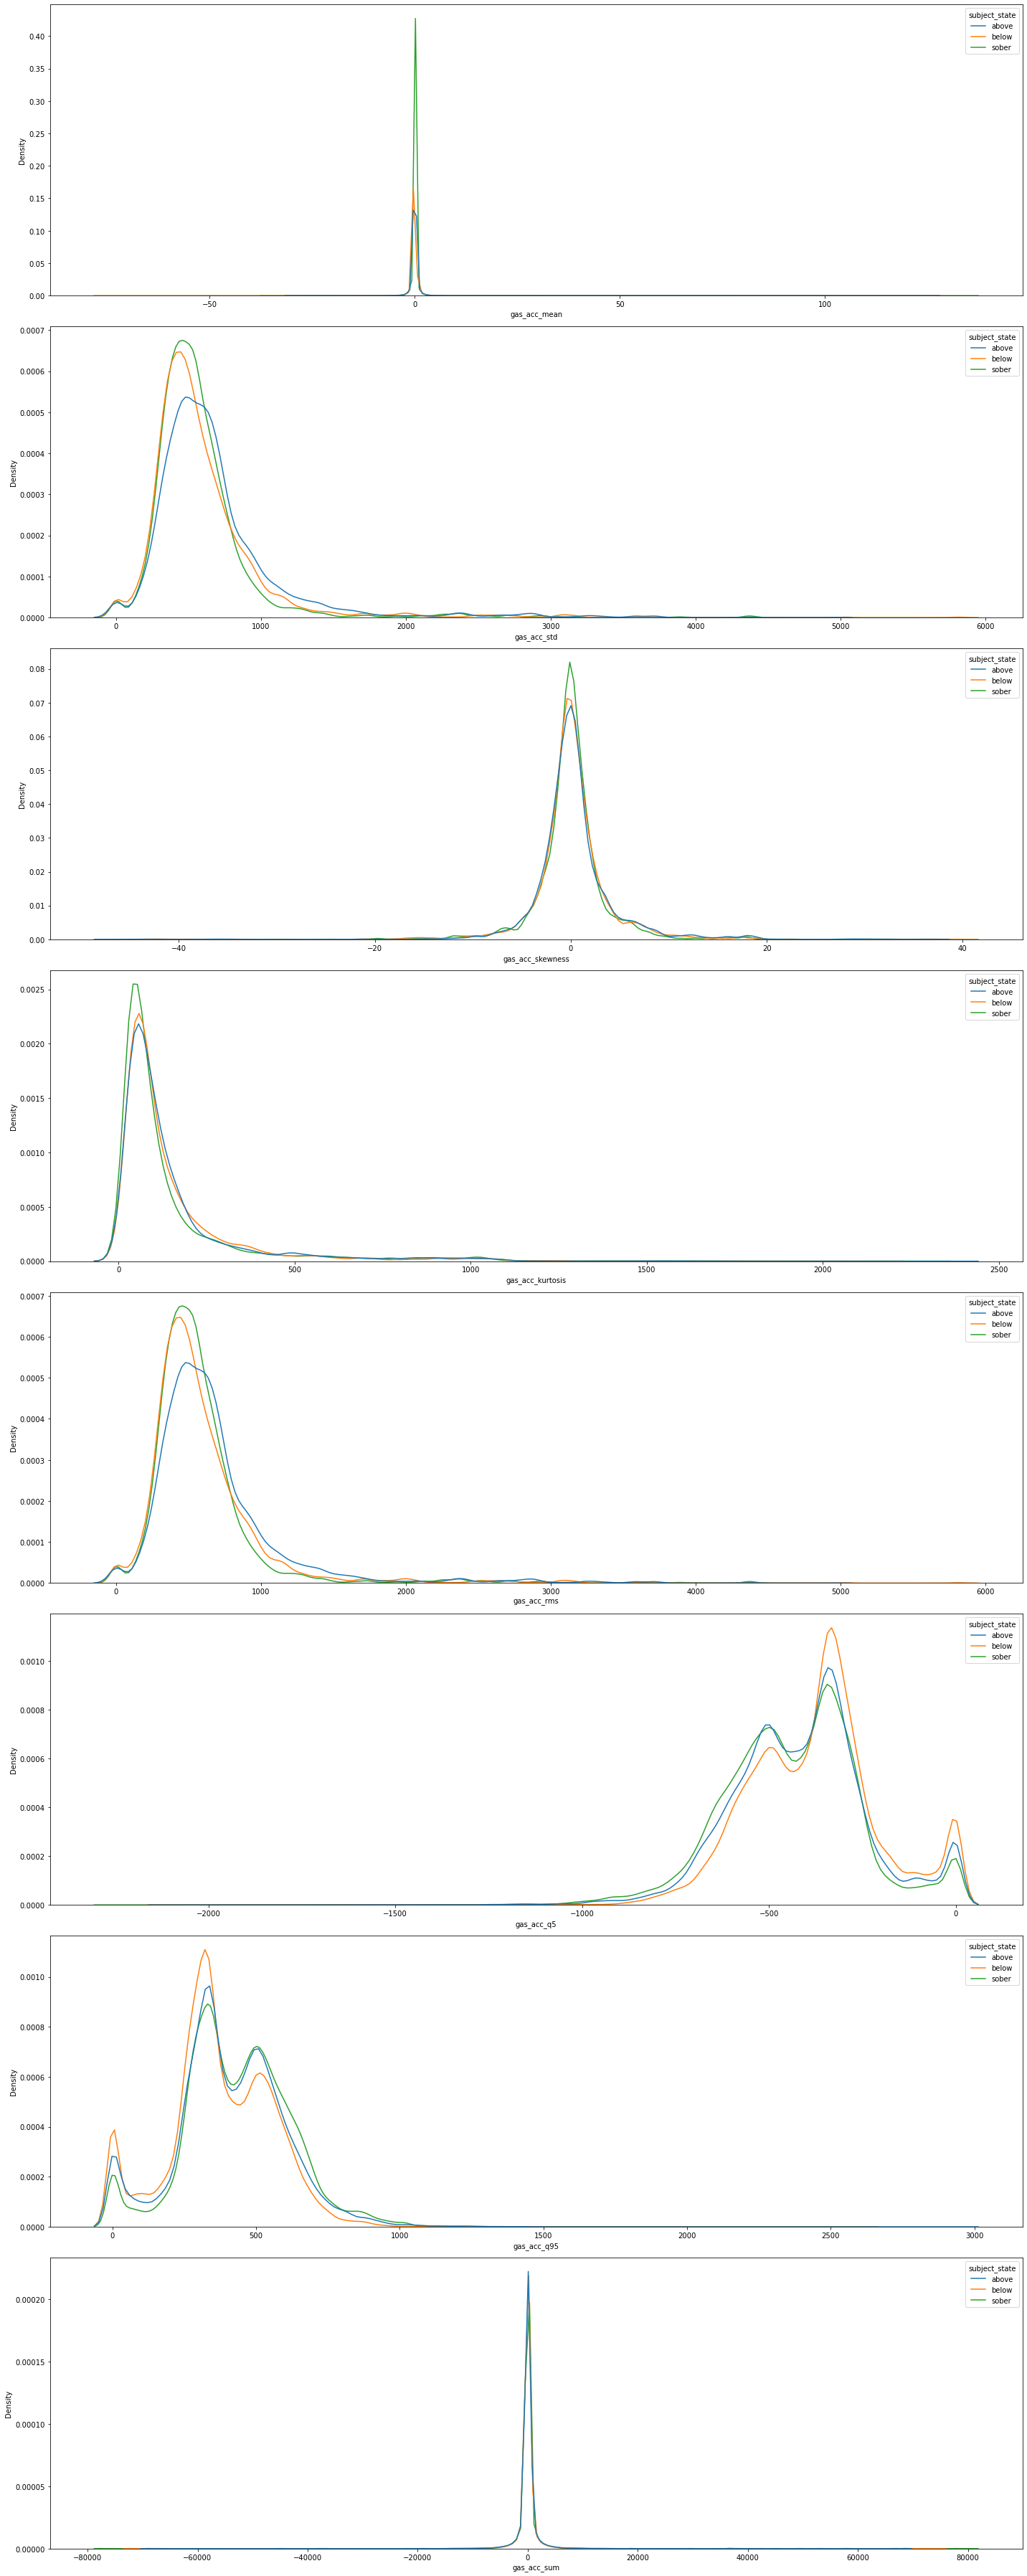

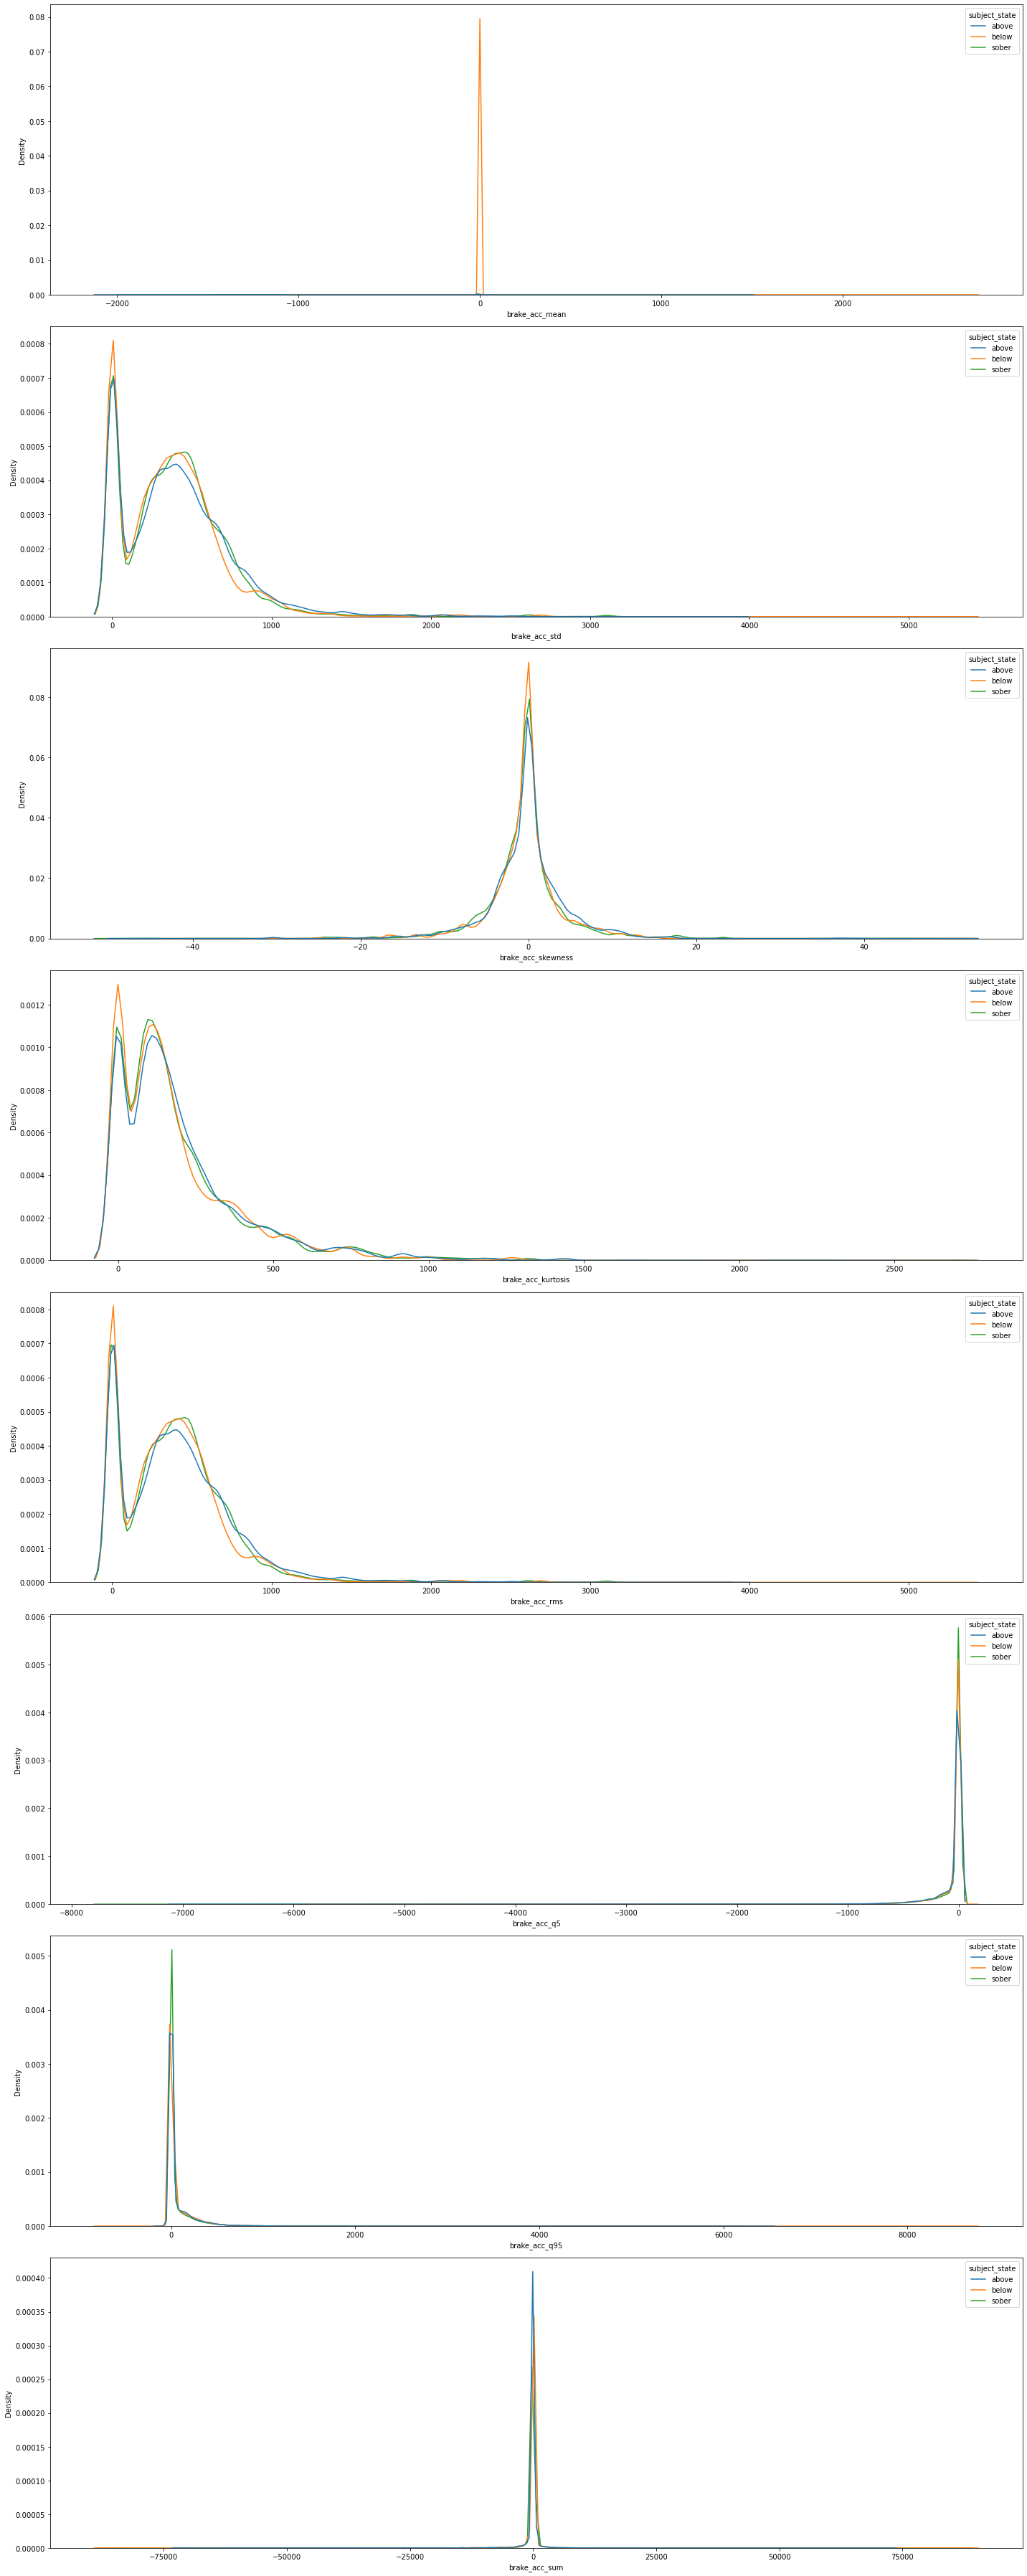

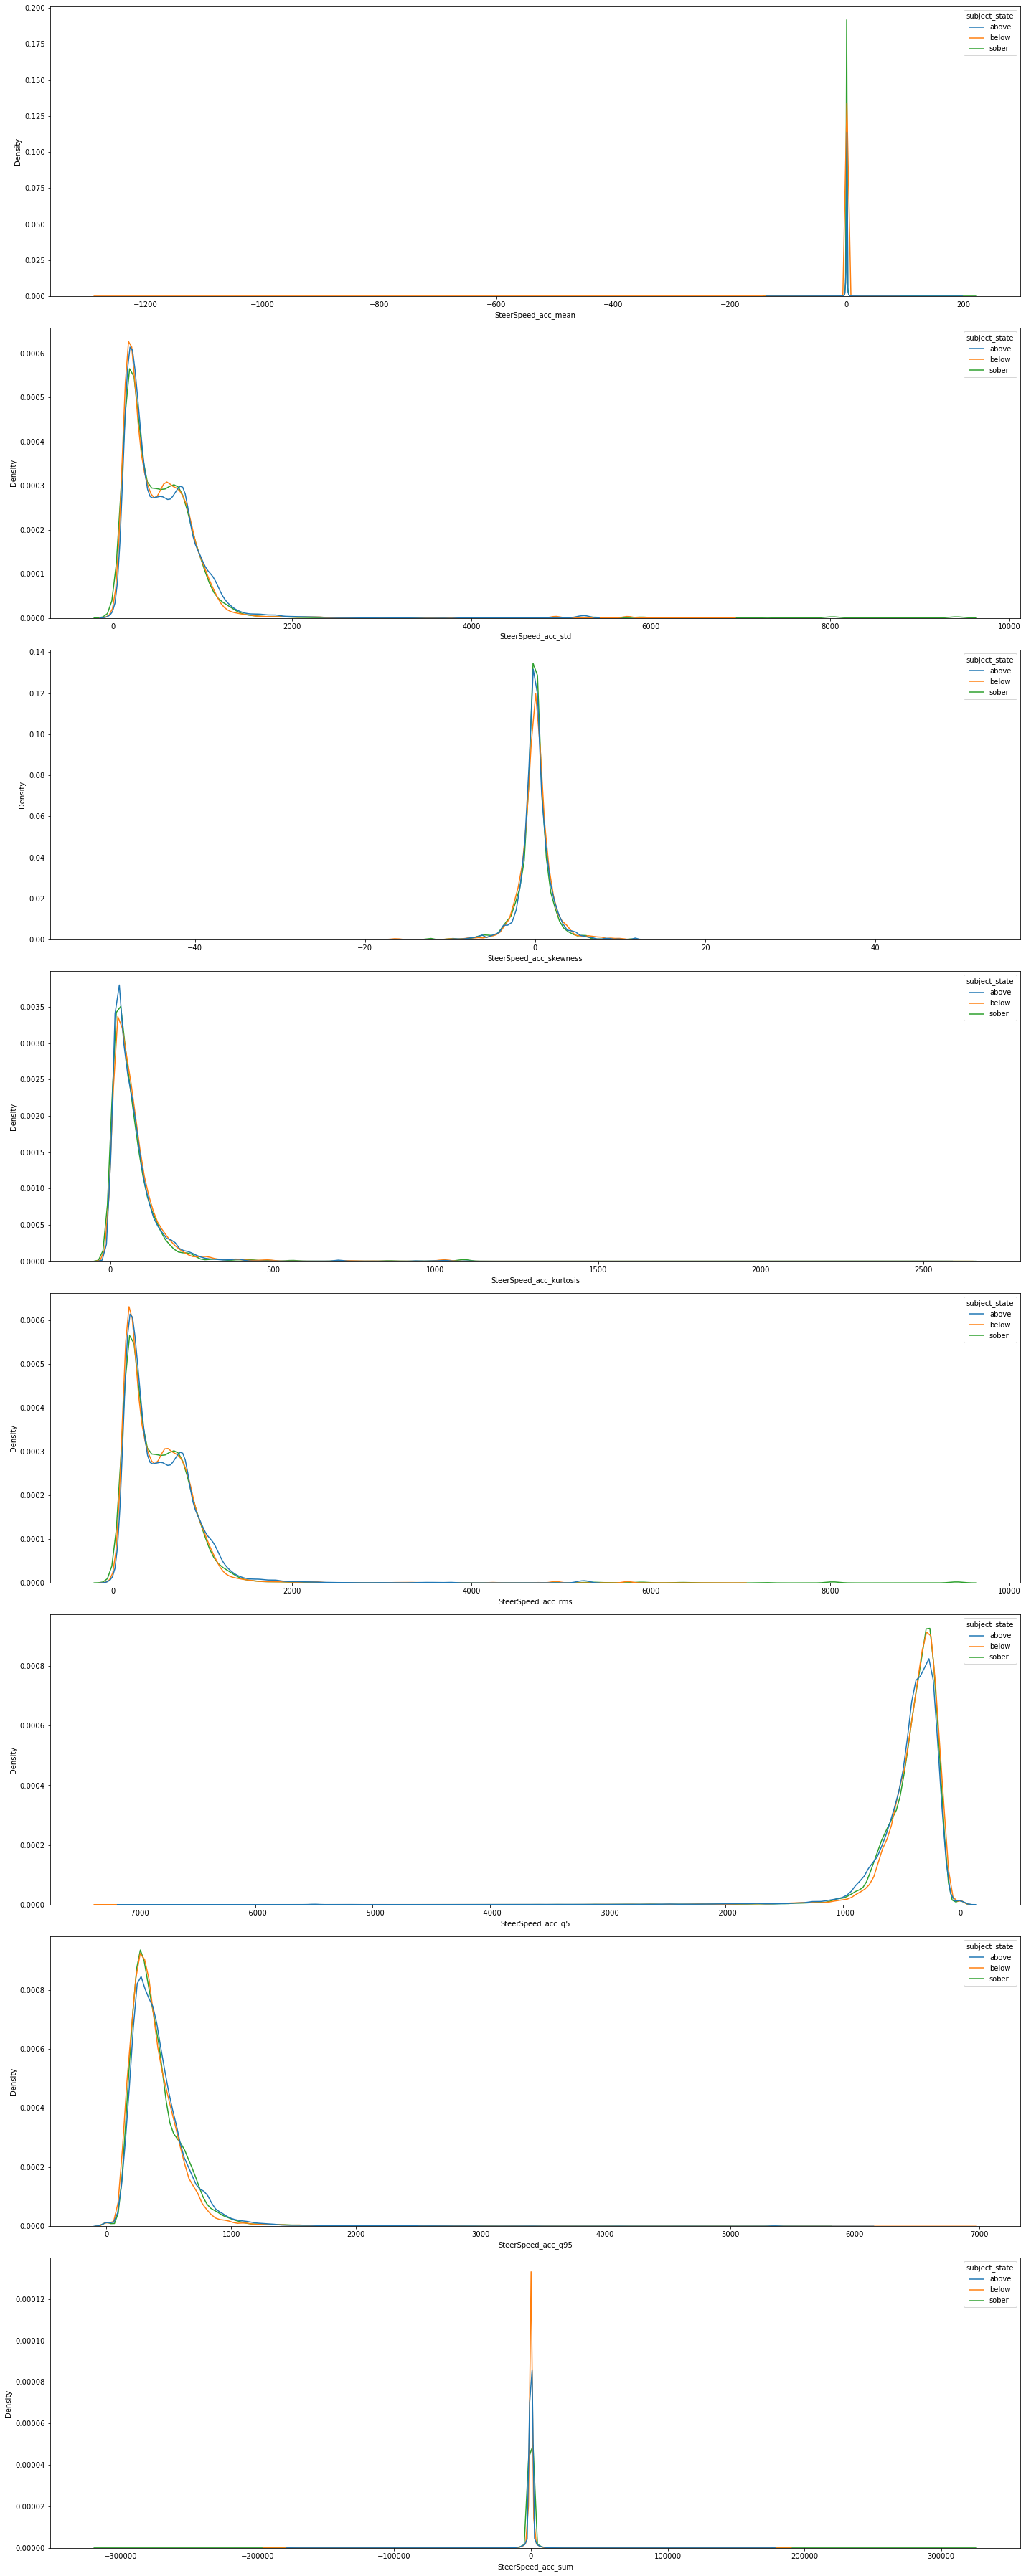

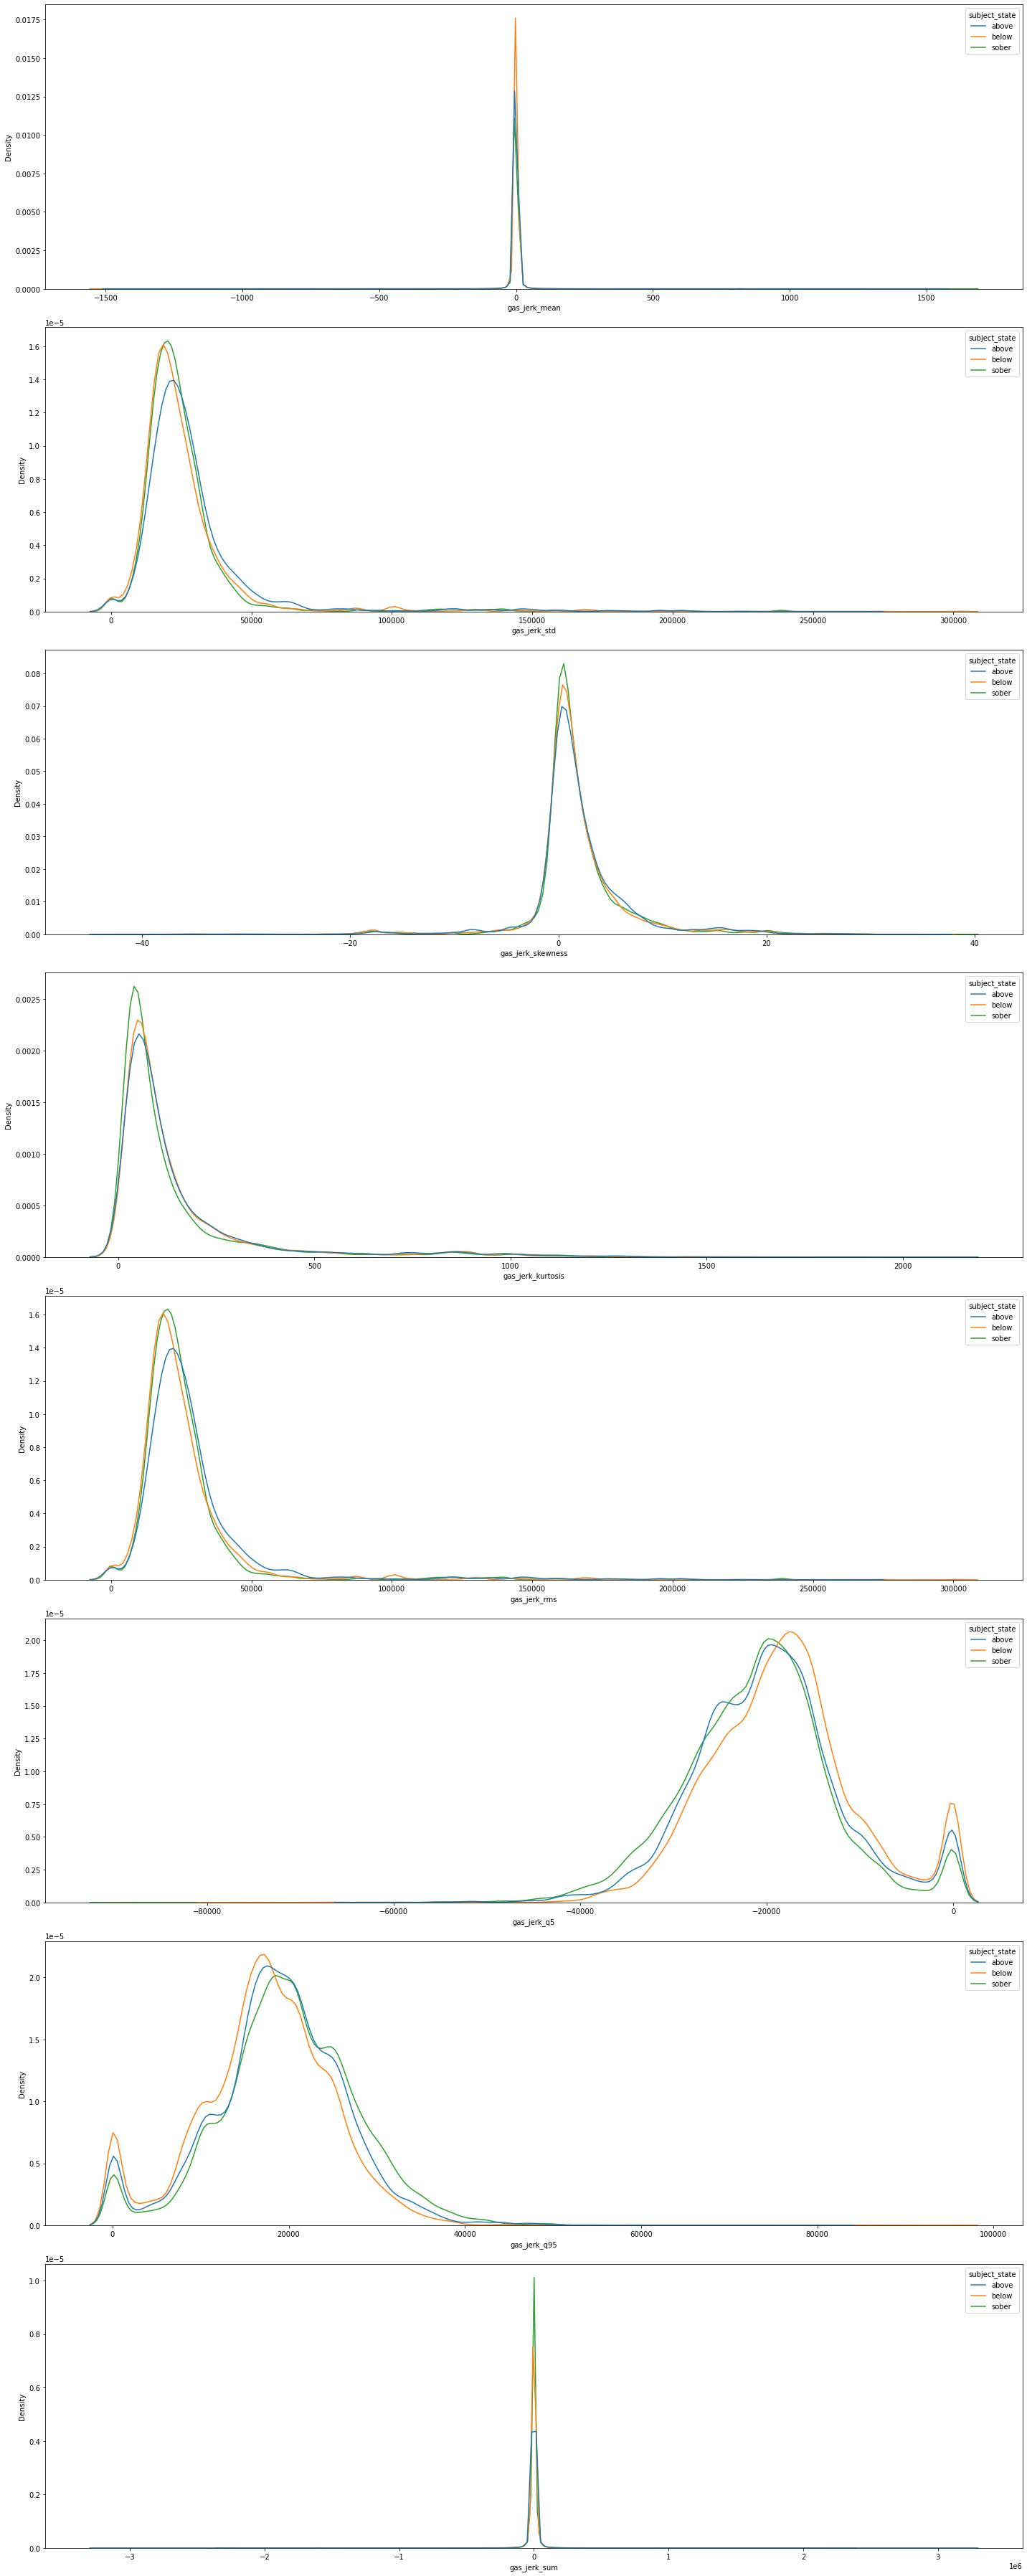

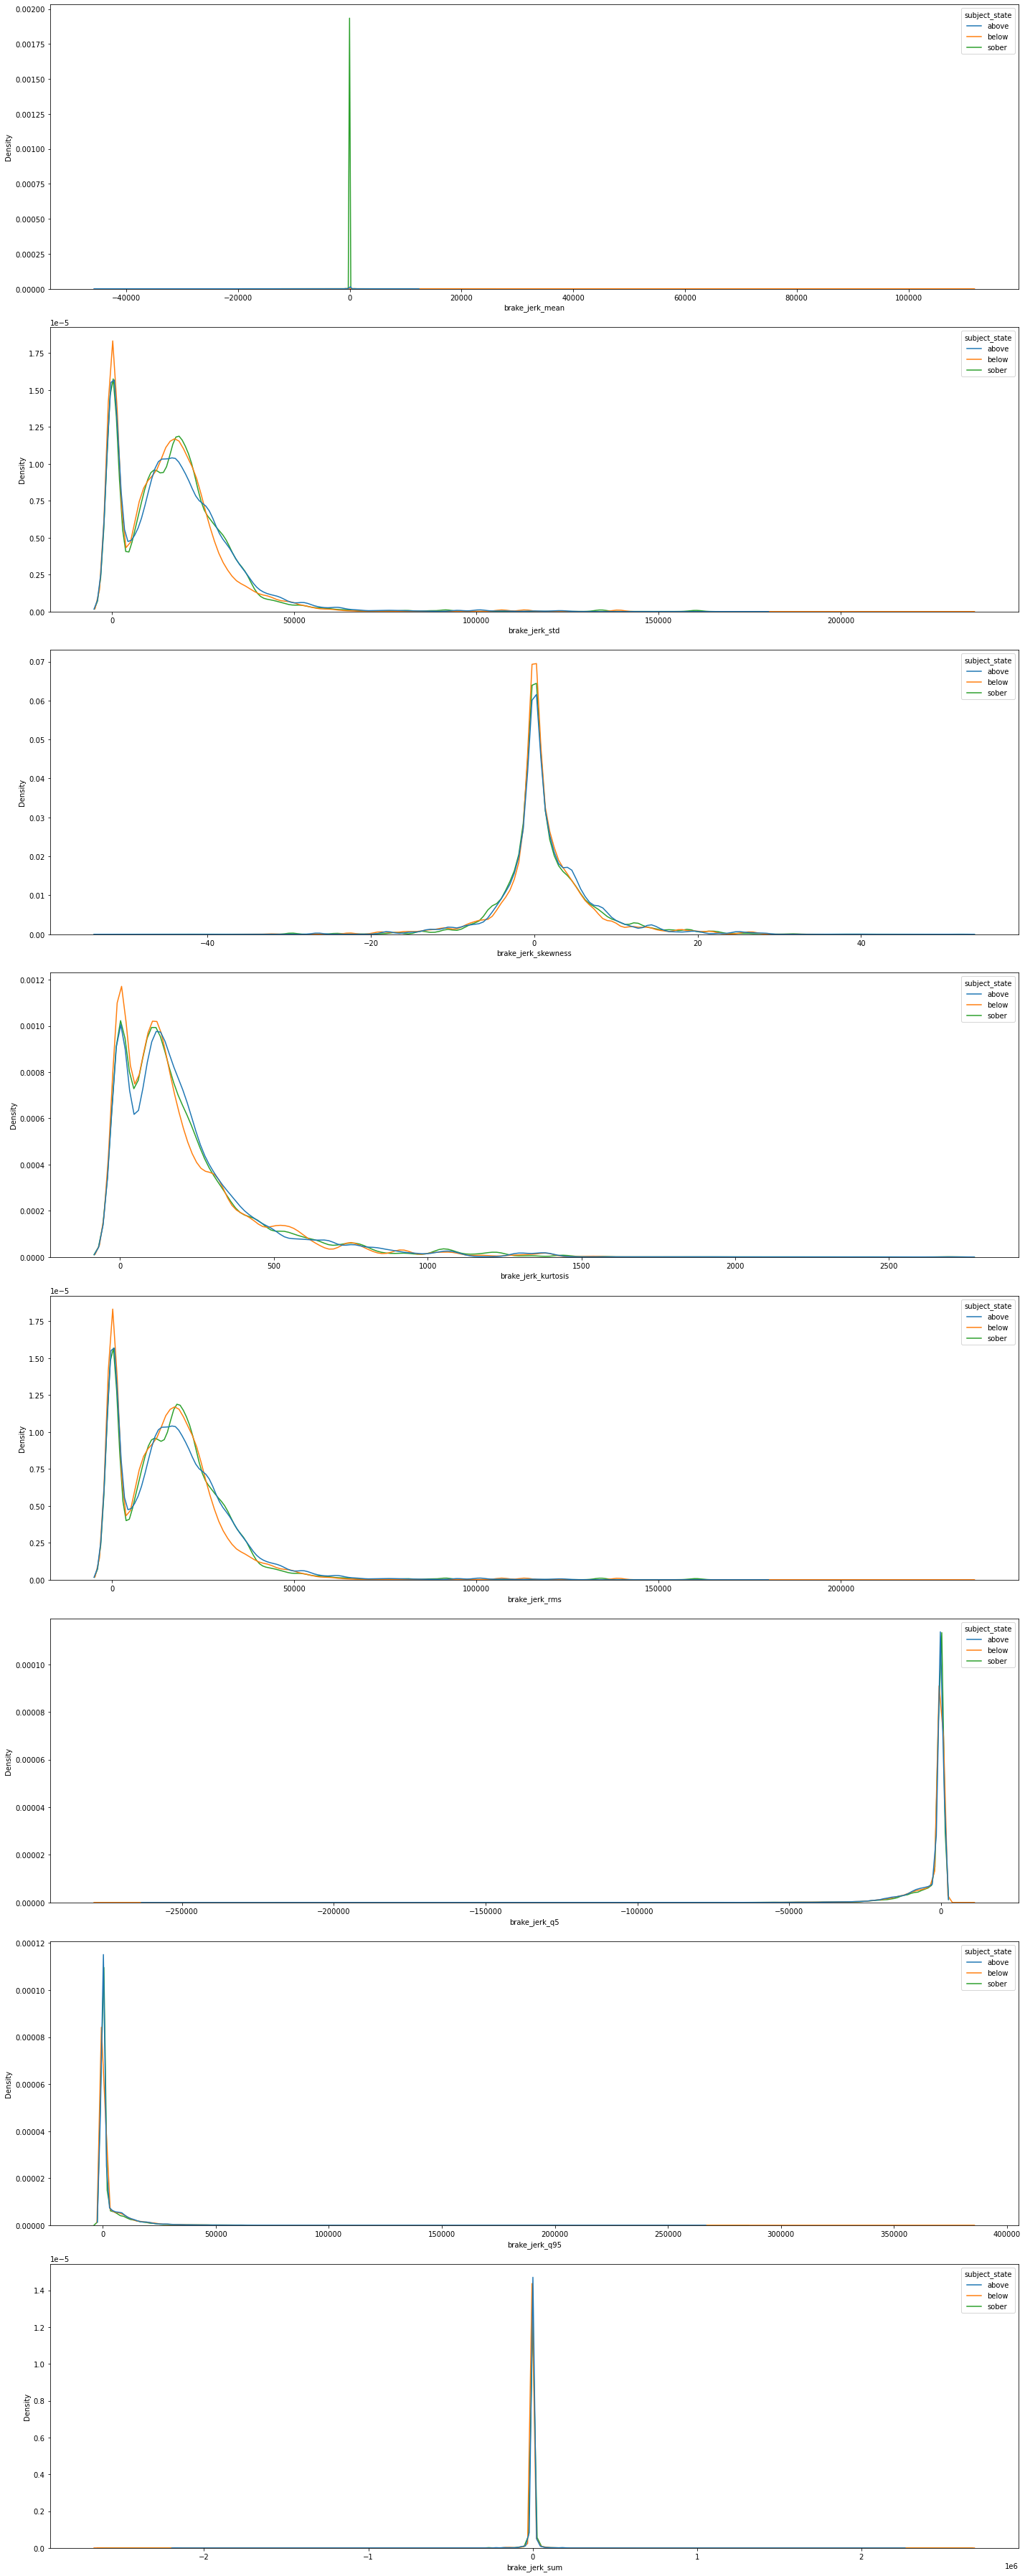

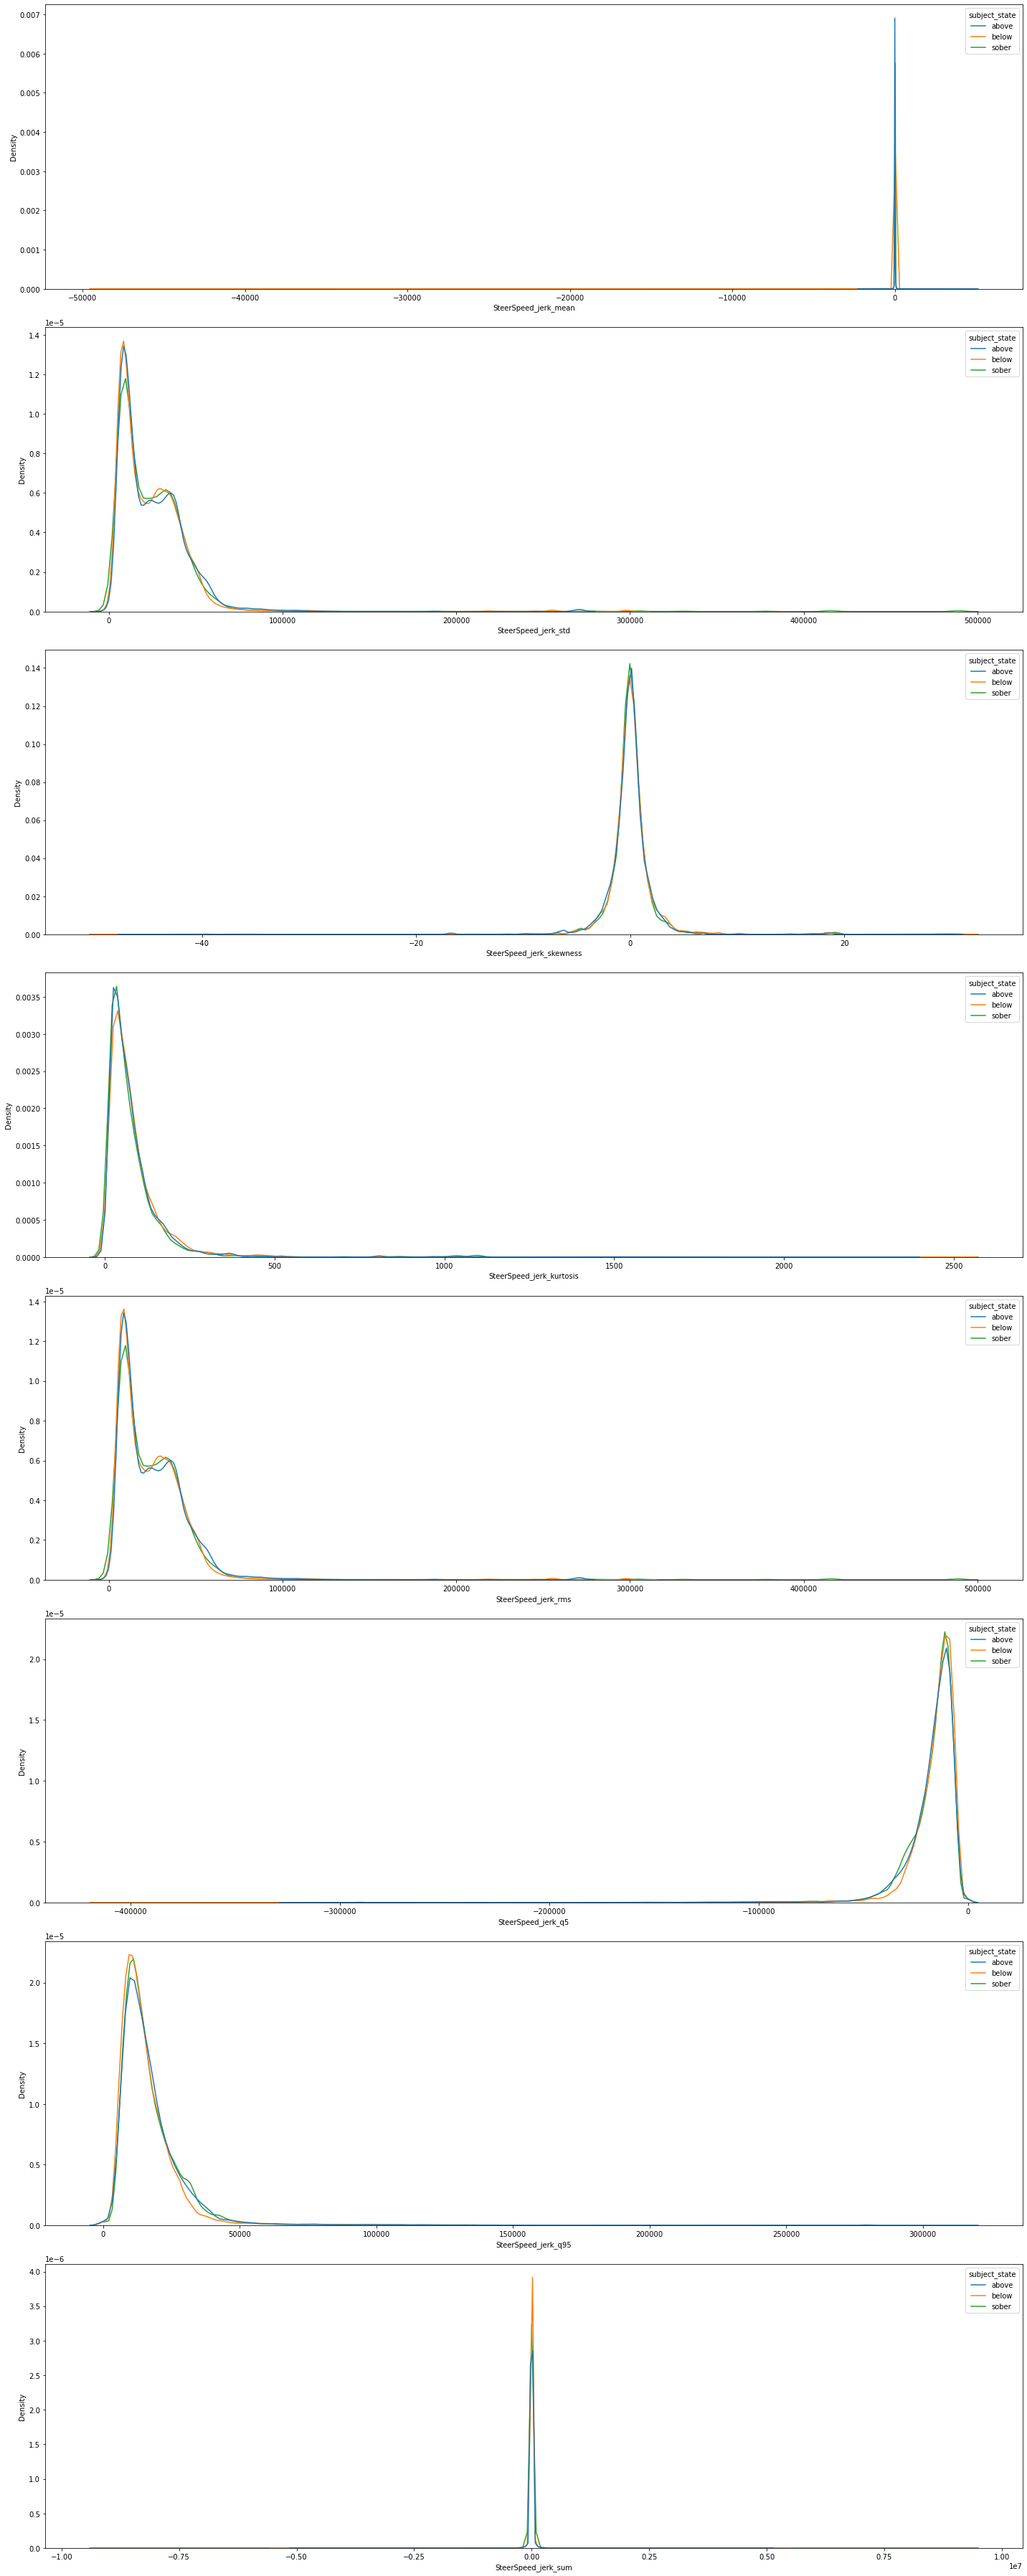

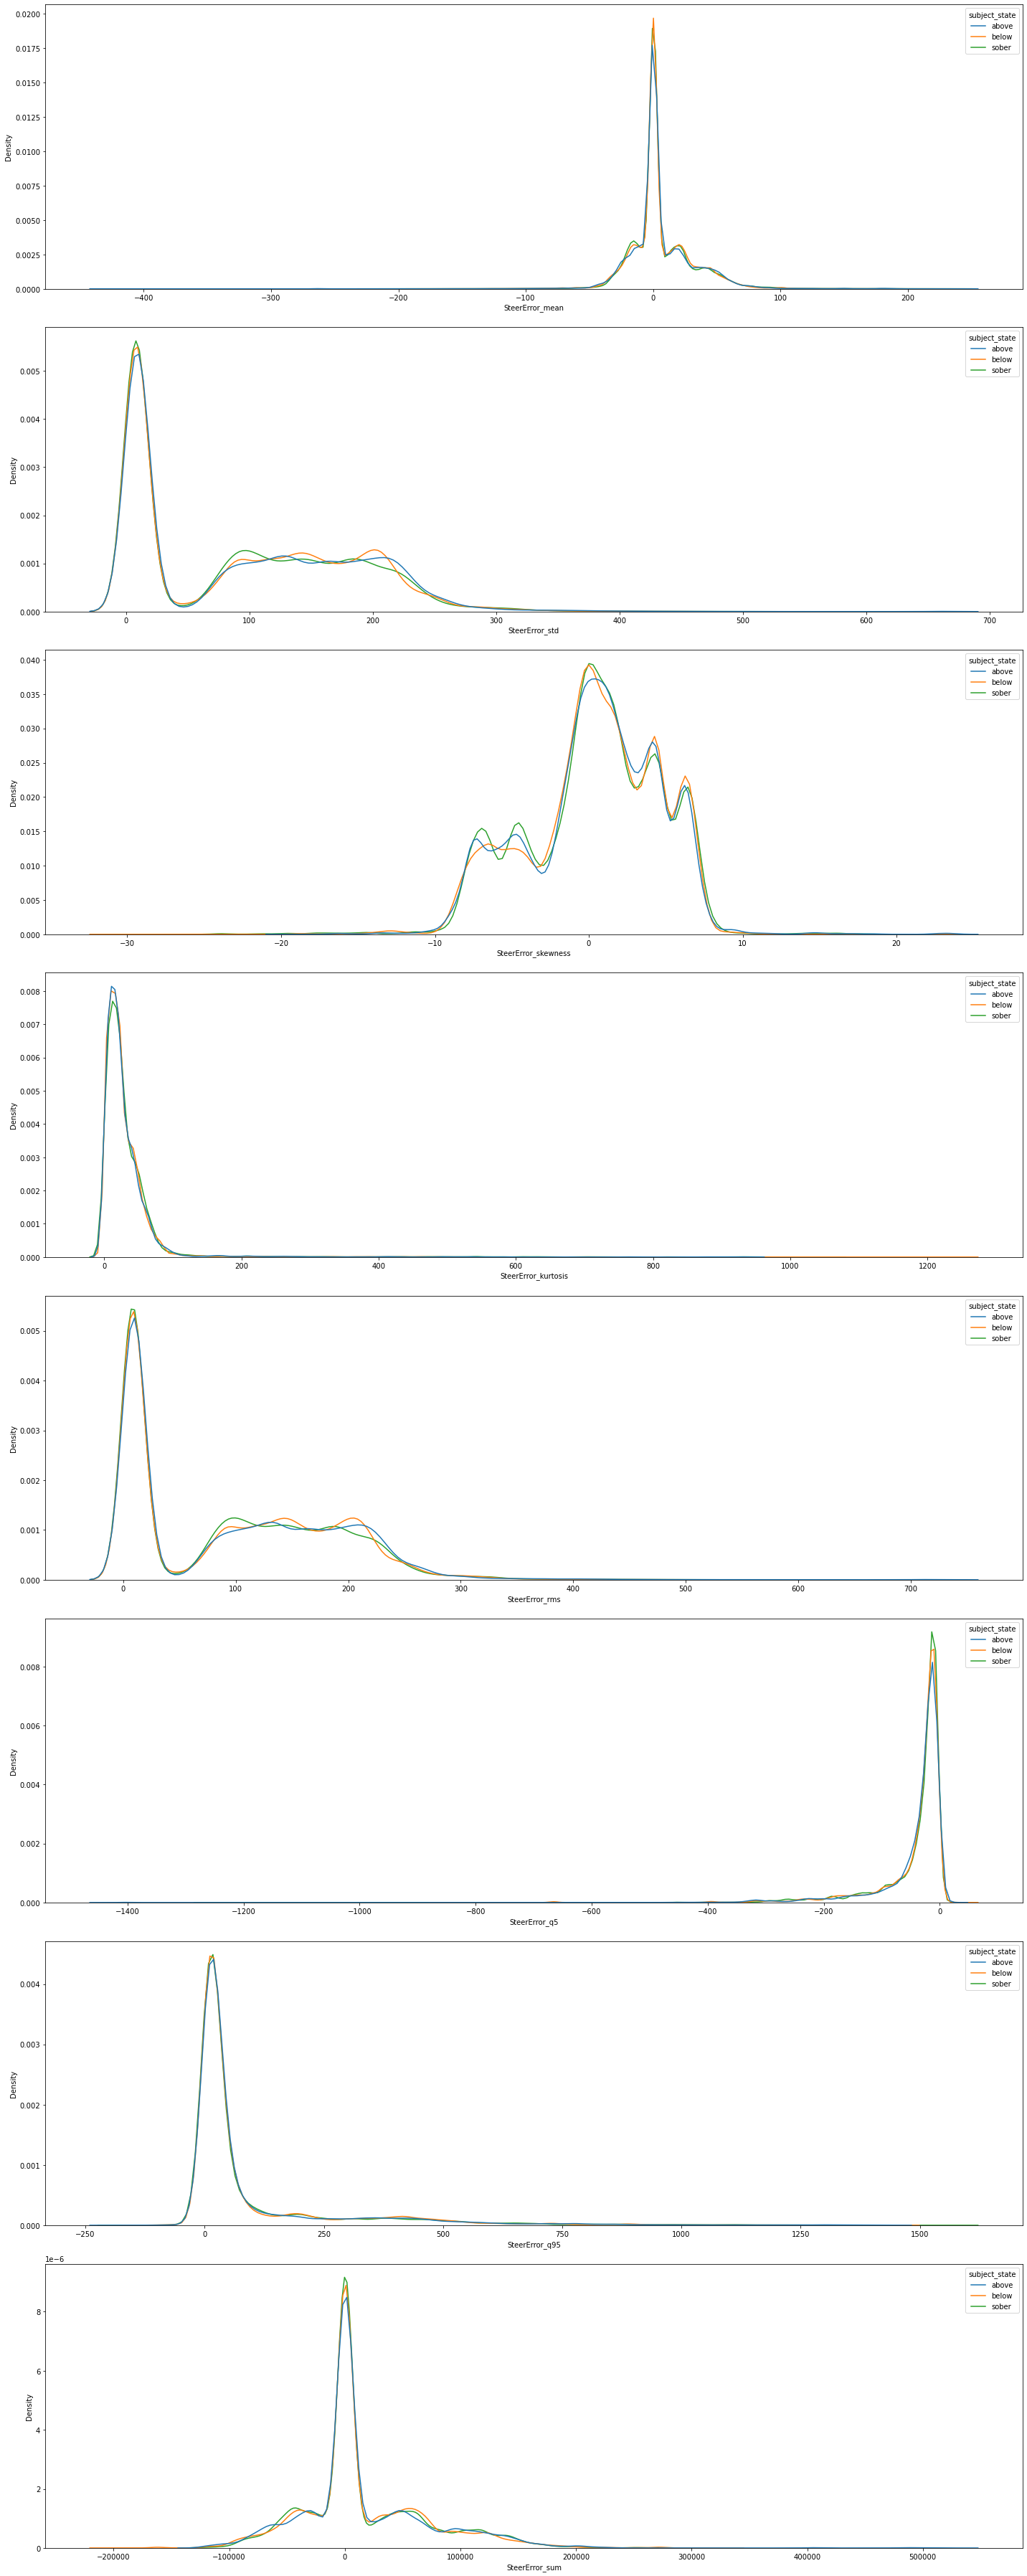

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotting_util as putil

plt.rcParams['figure.facecolor'] = 'white'

DRIVER_BEHAVIOR = ['steer', 'gas', 'brake', 'SteerSpeed', 'indicator_left', 'indicator_right',
                    'gas_vel', 'brake_vel', 'gas_acc', 'brake_acc', 'SteerSpeed_acc',
                    'gas_jerk', 'brake_jerk', 'SteerSpeed_jerk', 'SteerError']
VEHICLE_BEHAVIOR = ['velocity', 'acc', 'acc_jerk', 'latvel', 'YawRate', 'latvel_acc', 'latvel_jerk',
                    'YawRate_acc', 'YawRate_jerk']
RADAR = ['lane_position', 'lane_distance_left_edge', 'lane_distance_right_edge', 'lane_crossing', 
         'is_crossing_lane', 'is_crossing_lane_left', 'is_crossing_lane_right',
         'lane_crossing_left', 'lane_crossing_right', 'lane_switching', 'opp_lane_switching',
         'Ttc', 'TtcOpp', 'Thw', 'Dhw']
NAVI = ['dtoint', 'SpeedDif', 'speed_limit_exceeded']

SIGNALS = {'driver_behavior': DRIVER_BEHAVIOR}
           #'vehicle_behavior': VEHICLE_BEHAVIOR}
           #'radar': RADAR,
           #'navi': NAVI}

#STATS = ['mean', 'std', 'min','max', 'q5', 'q95', 'range', 'iqrange', 'iqrange_5_95', 'sum', 'energy', 'skewness',
         #'kurtosis', 'peaks', 'rms', 'lineintegral', 'n_above_mean', 'n_below_mean', 'n_sign_changes', 'ptp']
STATS = ['mean', 'std', 'skewness', 'kurtosis', 'rms', 'q5', 'q95', 'sum']

for signal_type, signals in SIGNALS.items():
    can_data = pd.read_parquet('out/can_data_features_{}_windowsize_90s_new.parquet'.format(signal_type))
    for signal in signals:
        fig, axes = putil.create_plot(len(STATS))
        putil.set_figure_size(fig, 20, 50)
        for i, stat in enumerate(STATS):
            sns.kdeplot(x=signal + '_' + stat, data=can_data, hue='subject_state', ax=axes[i])
        plt.tight_layout()
        plt.savefig('out/kdeplots/{}_{}.png'.format(signal_type, signal))